In [1]:
from matplotlib.lines import lineStyles
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections as collections
import os
from matplotlib import rc
import matplotlib
import pandas as pd
import json

In [5]:
# p_data = np.load('./Data/PW/polarization.npy',allow_pickle=True)

with open('./Data/PW/energy_defection.npy') as f:
  data = json.load(f)
  # dict_keys to dataframe pandas
  df_energy = pd.DataFrame(data)

with open('./Data/PW/conv_times.npy') as f:
  data = json.load(f)
  # dict_keys to dataframe pandas
  df_ct = pd.DataFrame(data)

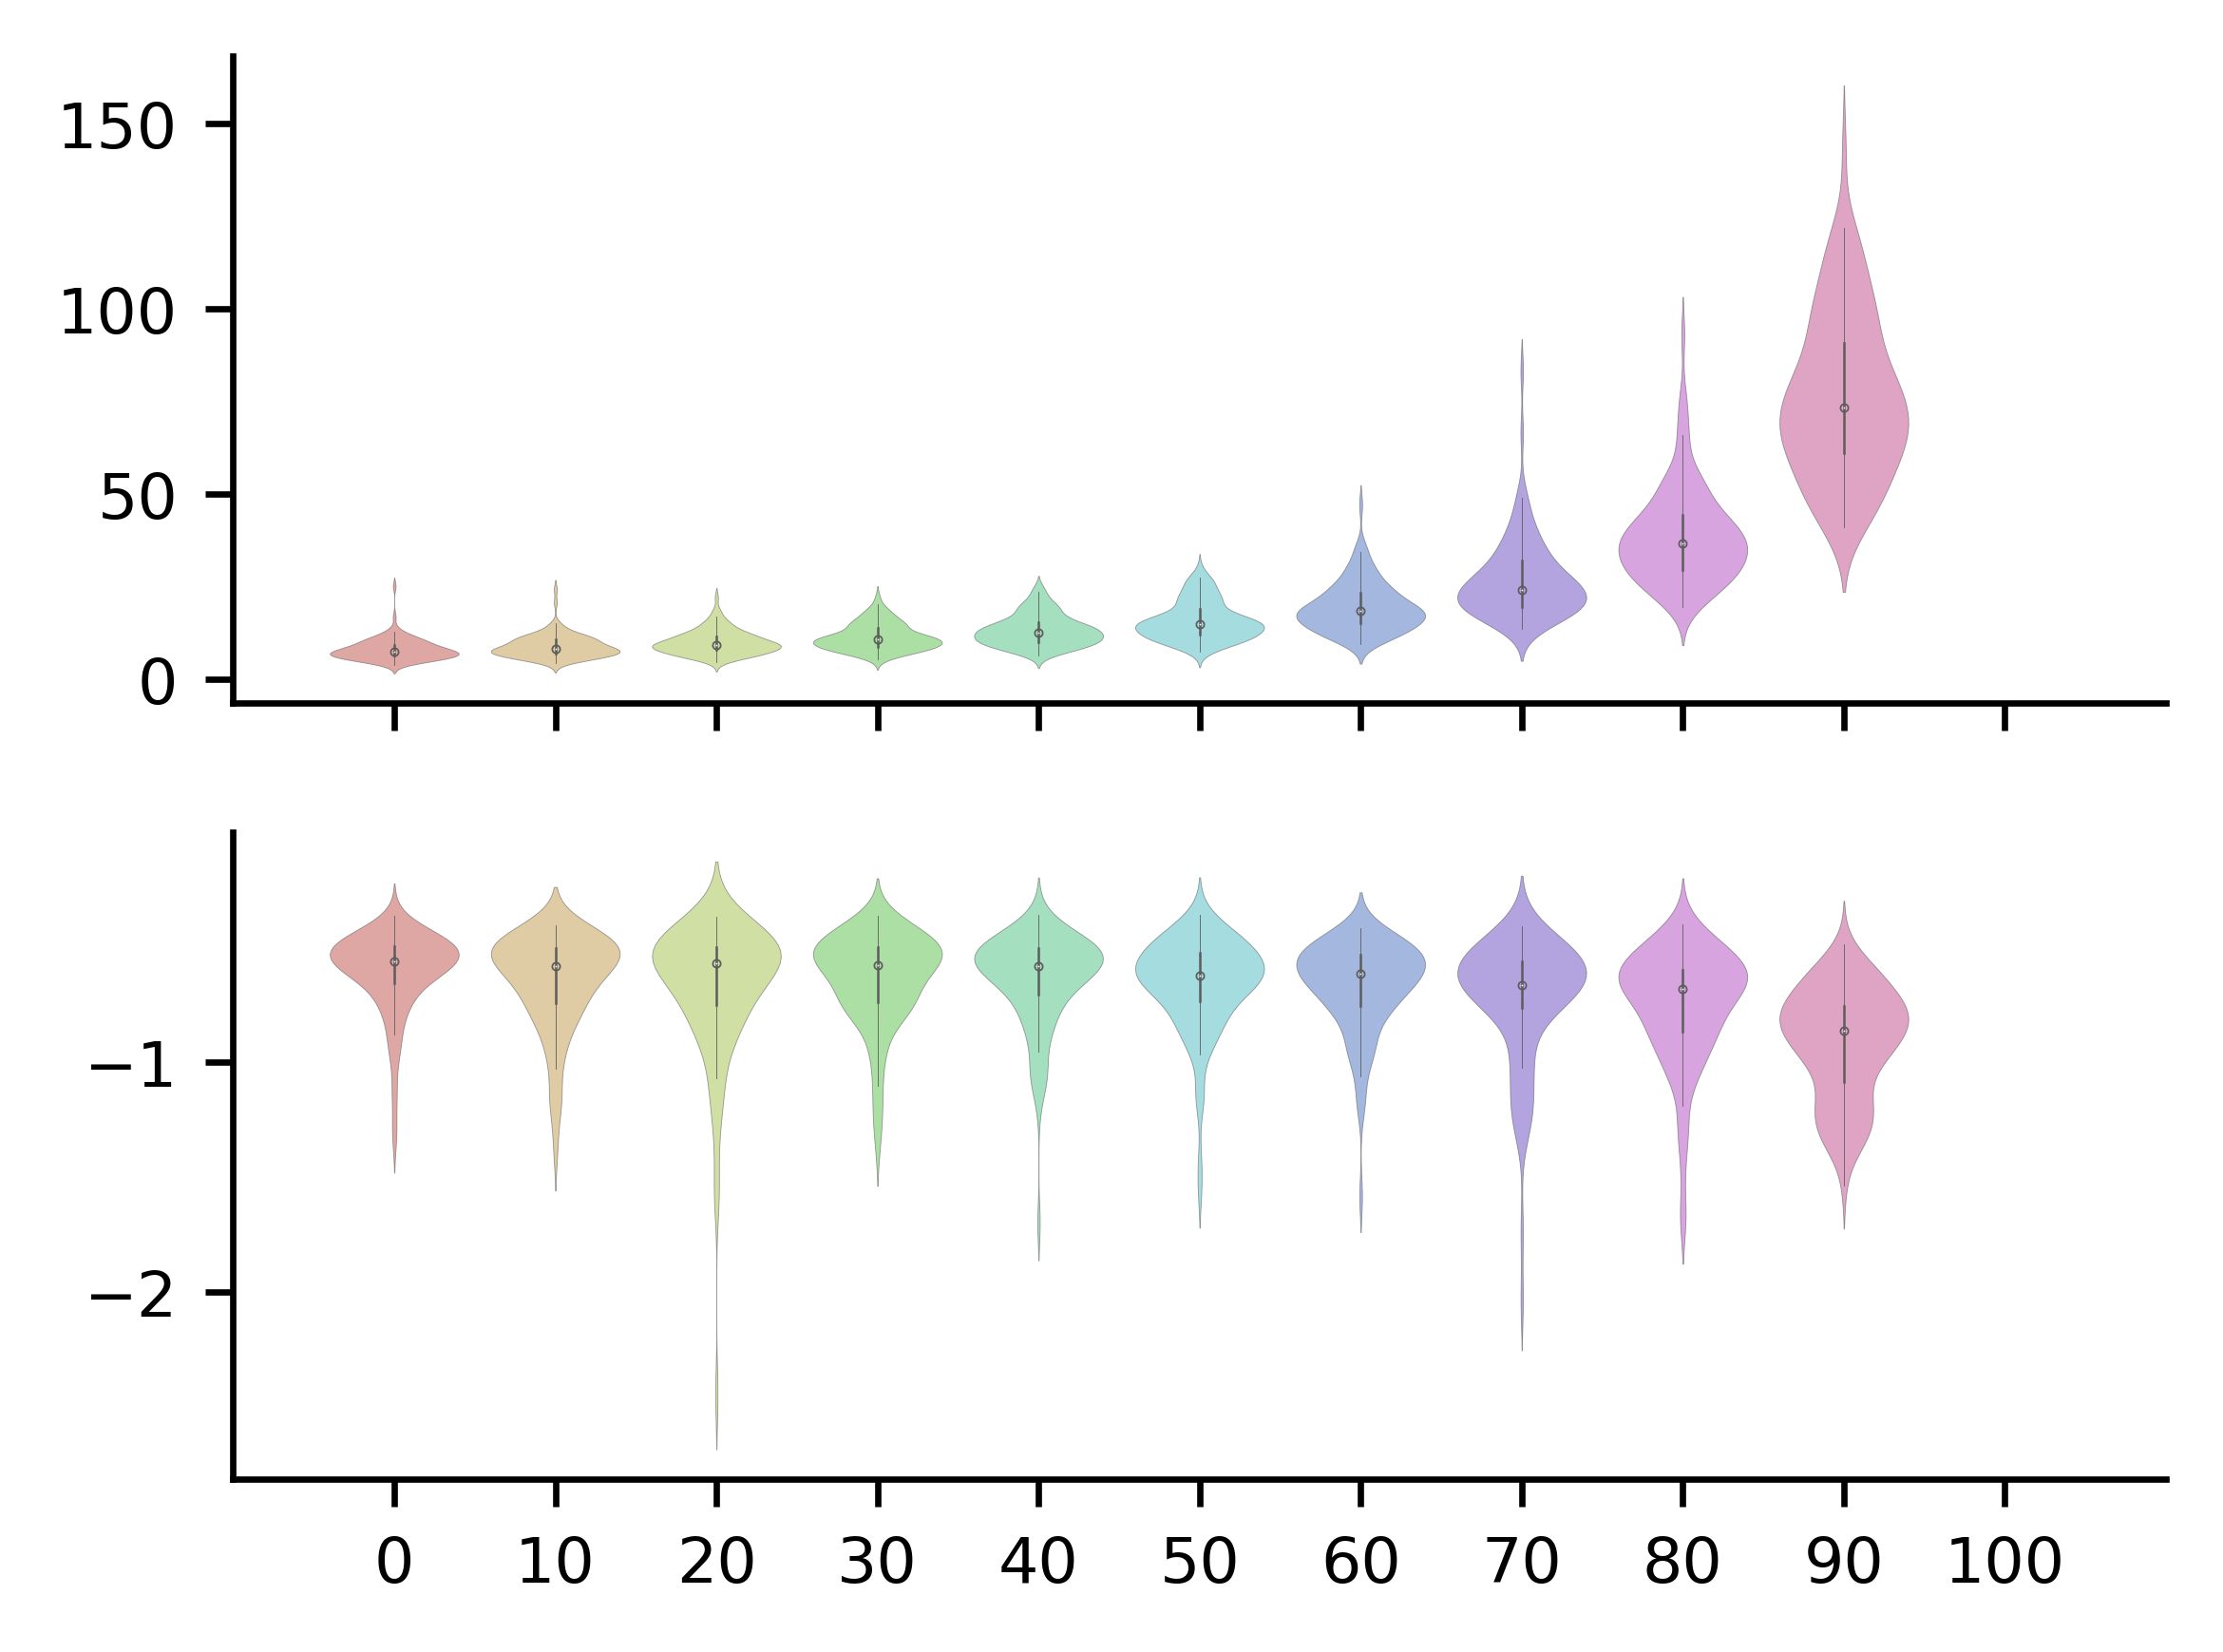

In [14]:
fig, axs = plt.subplots(nrows=2,ncols=1,sharex= True,figsize=(4,3),dpi=600)
# polarization
ax = axs[0]
sns.violinplot(data=df_ct,alpha=0.2, edgecolor='none',linewidth=0.1,palette='hls',ax=axs[0],scale='width')
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
for art in ax.get_children():
    if isinstance(art, matplotlib.collections.PolyCollection):
        art.set_alpha(0.6)
ax.set_xlim(-1,11)
# xticks = range(len(df_ct.columns)+1)  # Set x-ticks positions
# xticklabels = list(df_ct.columns)  # Set x-tick labels, replace with your categories
# xticklabels.append('1.0')
# ax.set_xticks(xticks)
# ax.set_xticklabels(xticklabels, rotation=45)  # Optional: rotate labels for better readability

ax.tick_params(axis='both', which='major', labelsize=8)
# energy cost
ax = axs[1]
sns.violinplot(data=df_energy,alpha=0.2, edgecolor='none',linewidth=0.1,palette='hls',ax=axs[1],scale='width')
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
for art in ax.get_children():
    if isinstance(art, matplotlib.collections.PolyCollection):
        art.set_alpha(0.6)

xticks = range(len(df_energy.columns)+1)  # Set x-ticks positions
# xticklabels = list(df_energy.columns)  # Set x-tick labels, replace with your categories
# xticklabels.append('1.0')
xticklabels = ['0','10','20','30','40','50','60','70','80','90','100']
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=0, fontdict={'size':8})  # Optional: rotate labels for better readability
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xlim(-1,11)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2) 
plt.savefig('PW_violin.png',dpi=600,bbox_inches='tight',transparent=True)
plt.show()


In [27]:
def load_json_as_df(file_path):
    """Load JSON data from a file and convert it into a pandas DataFrame."""
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Assuming the loaded data is a dictionary where values are lists
    # print(file_path)
    # print(data)
    lists = [len(v) for v in data.values()]
    max_length = 0
    if len(lists)!=0:
        max_length = max(len(v) for v in data.values())
        

    # Extend shorter lists with None to match the max length
    standardized_data = {
        k: v + [None] * abs(max_length - len(v)) if isinstance(v, list) else v
        for k, v in data.items()
    }

    return pd.DataFrame(standardized_data)

# Example usage:
file_paths = [
    './Data/HP/20D-${\\bf Z_{all}}$conv_times.npy',  # Assuming these are actually JSON files
    './Data/HP/20D-${\\bf Z_{a}}$conv_times.npy',
    './Data/HP/20D-${\\bf Z_{o}}$conv_times.npy',
    './Data/HP/20D-${\\bf Z_{r}}$conv_times.npy',
    './Data/HP/20D-${\\bf Z_{all}}$enrgies_defection.npy', 
    './Data/HP/20D-${\\bf Z_{a}}$enrgies_defection.npy',
    './Data/HP/20D-${\\bf Z_{o}}$enrgies_defection.npy',
    './Data/HP/20D-${\\bf Z_{r}}$enrgies_defection.npy',
    './Data/HP/50D-${\\bf Z_{all}}$conv_times.npy',  # Assuming these are actually JSON files
    './Data/HP/50D-${\\bf Z_{a}}$conv_times.npy',
    './Data/HP/50D-${\\bf Z_{o}}$conv_times.npy',
    './Data/HP/50D-${\\bf Z_{r}}$conv_times.npy',
    './Data/HP/50D-${\\bf Z_{all}}$enrgies_defection.npy',
    './Data/HP/50D-${\\bf Z_{a}}$enrgies_defection.npy',
    './Data/HP/50D-${\\bf Z_{o}}$enrgies_defection.npy',
    './Data/HP/50D-${\\bf Z_{r}}$enrgies_defection.npy',
    './Data/HP/80D-${\\bf Z_{all}}$conv_times.npy',  # Assuming these are actually JSON files
    './Data/HP/80D-${\\bf Z_{a}}$conv_times.npy',
    './Data/HP/80D-${\\bf Z_{o}}$conv_times.npy',
    './Data/HP/80D-${\\bf Z_{r}}$conv_times.npy',
    './Data/HP/80D-${\\bf Z_{all}}$enrgies_defection.npy',
    './Data/HP/80D-${\\bf Z_{a}}$enrgies_defection.npy',
    './Data/HP/80D-${\\bf Z_{o}}$enrgies_defection.npy',
    './Data/HP/80D-${\\bf Z_{r}}$enrgies_defection.npy',
]

df_names = ['df_ct_all_n20', 'df_ct_a_n20', 'df_ct_o_n20', 'df_ct_r_n20', 'df_energy_all_n20', 'df_energy_a_n20', 'df_energy_o_n20', 'df_energy_r_n20',
             'df_ct_all_n50', 'df_ct_a_n50', 'df_ct_o_n50', 'df_ct_r_n50', 'df_energy_all_n50', 'df_energy_a_n50', 'df_energy_o_n50', 'df_energy_r_n50',
             'df_ct_all_n80', 'df_ct_a_n80', 'df_ct_o_n80', 'df_ct_r_n80', 'df_energy_all_n80', 'df_energy_a_n80', 'df_energy_o_n80', 'df_energy_r_n80']
# df_names = ['df_ct_all_n80', 'df_ct_a_n80', 'df_ct_o_n80', 'df_ct_r_n80', 'df_energy_all_n80', 'df_energy_a_n80', 'df_energy_o_n80', 'df_energy_r_n80']
dataframes = {name: load_json_as_df(path) for name, path in zip(df_names, file_paths)}

# To print the first few rows of each DataFrame
# for name, df in dataframes.items():
#     if '80' in name:
#         print(f"{name}:")
#         print(df.head(), "\n")


df_ct_all_n20
        0.0       0.1       0.2       0.3       0.4       0.5       0.6
0  1.935000  2.083000  2.320000  2.563000  2.933000  3.432990  4.413793
1  0.342746  0.290536  0.381314  0.370852  0.580871  0.599436  1.615384


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


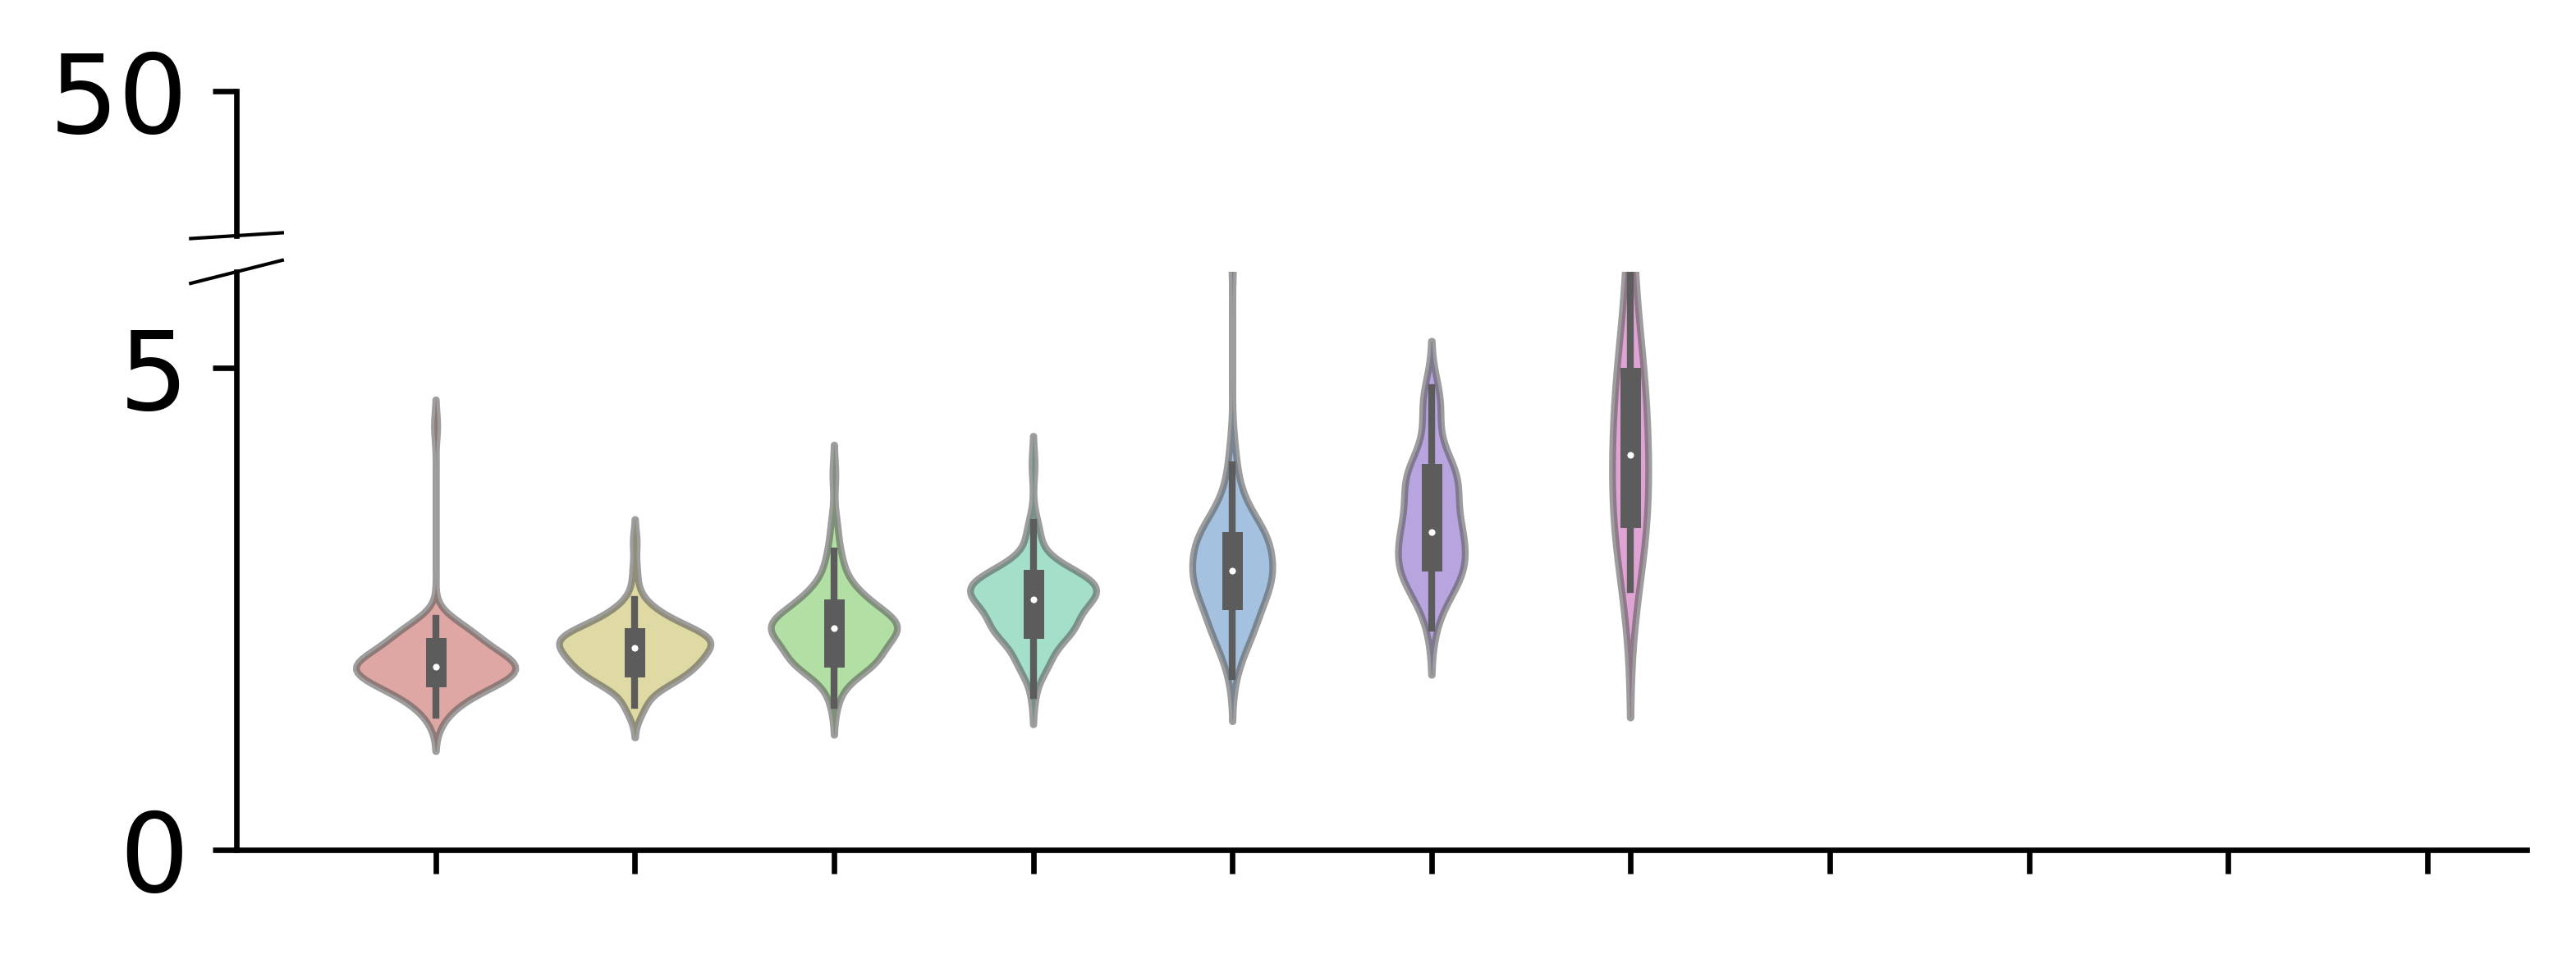

df_ct_a_n20
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0  1.935000  1.914000  1.912000  1.908000  1.907000  1.906000  1.906000   
1  0.342746  0.248202  0.245471  0.242767  0.239272  0.237411  0.238252   

        0.7       0.8       0.9       1.0  
0  1.906000  1.907000  1.907000  1.907000  
1  0.238252  0.241352  0.241352  0.241352  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


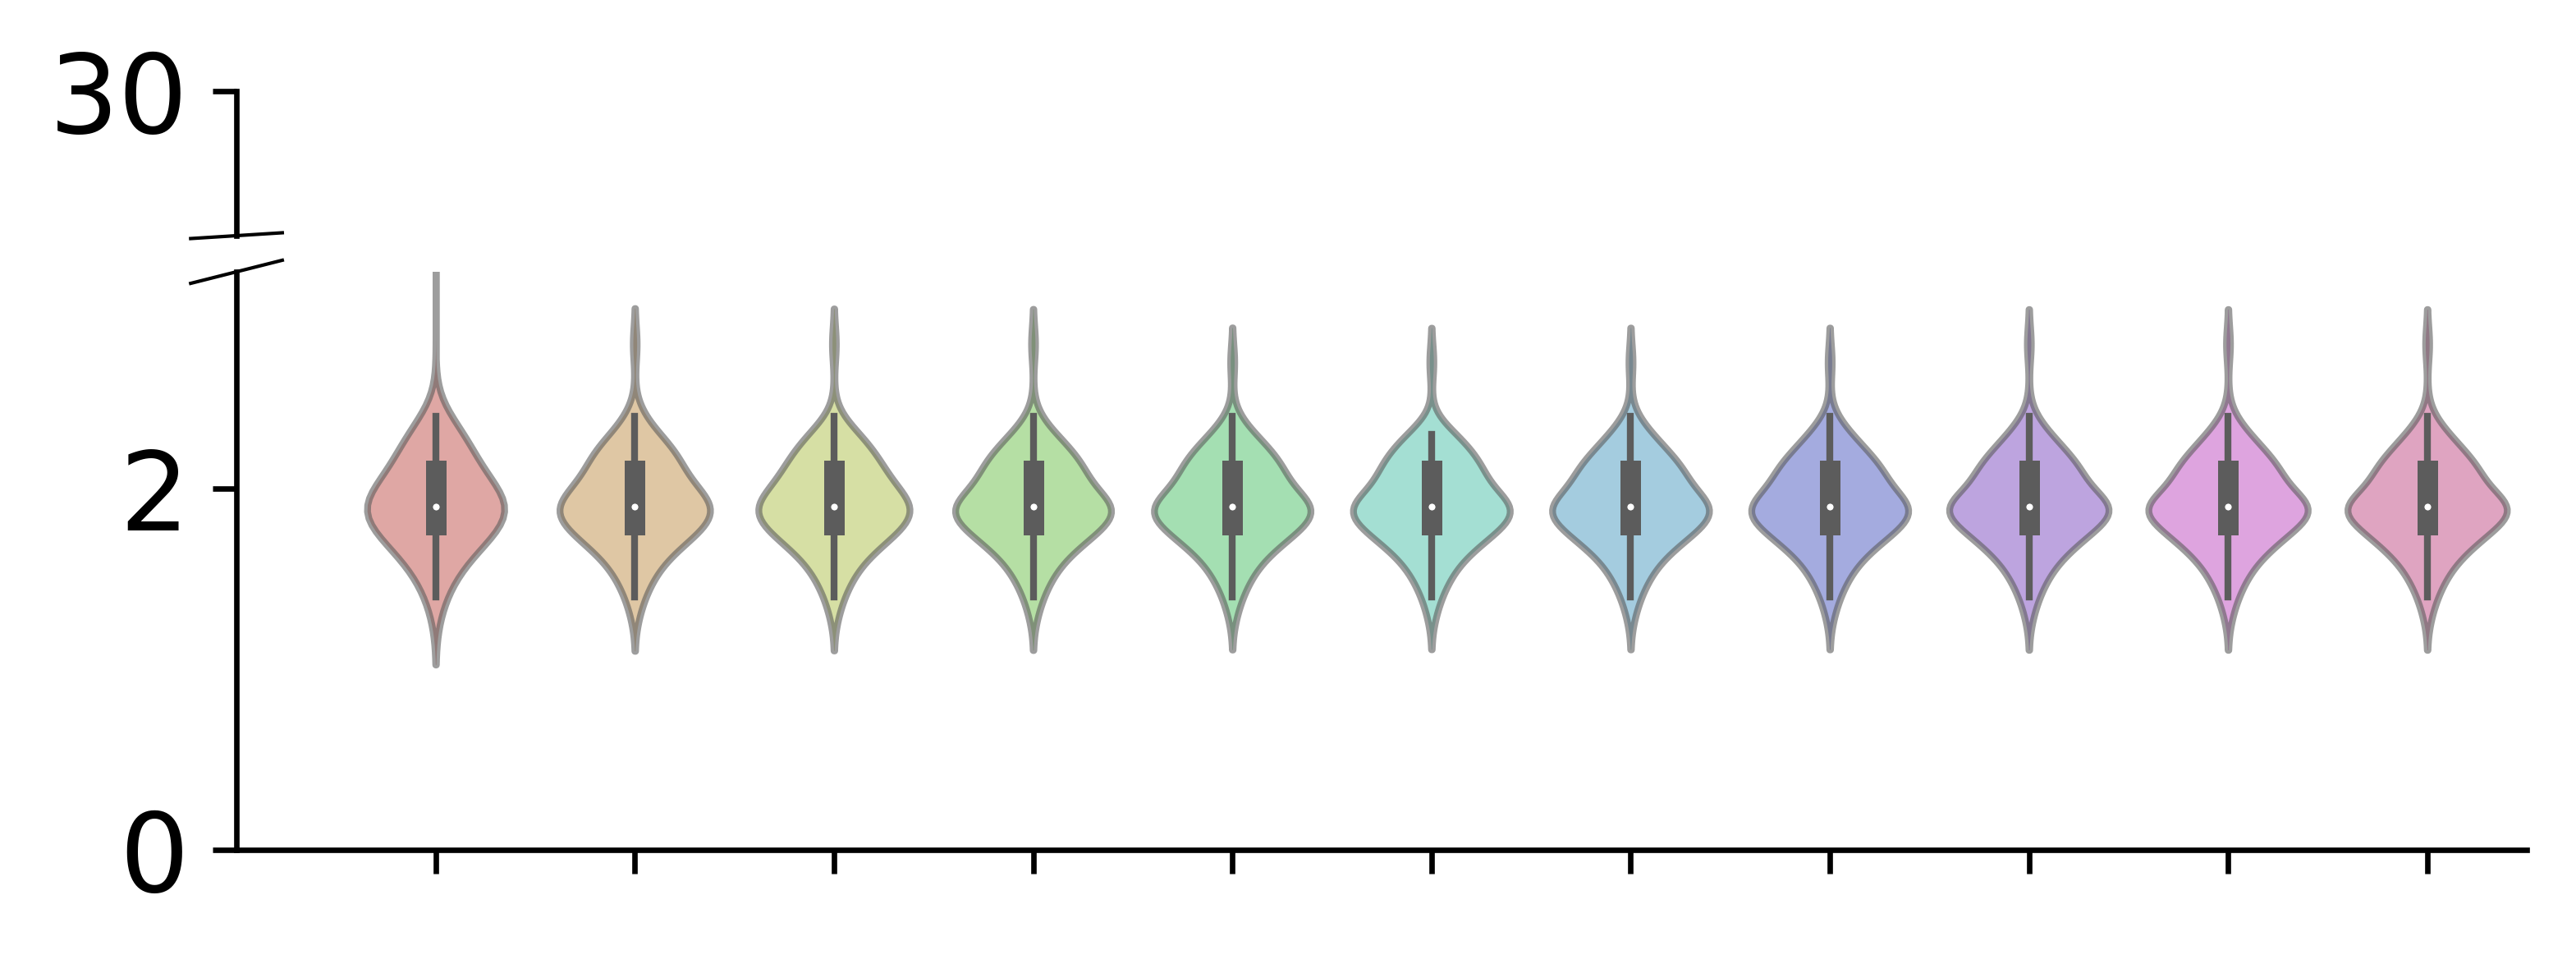

df_ct_o_n20
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0  1.935000  2.067000  2.219000  2.533000  2.681000  3.104000  5.389000   
1  0.342746  0.276787  0.333675  1.369895  0.853076  1.722726  6.024133   

         0.7  
0  15.911340  
1  22.946679  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


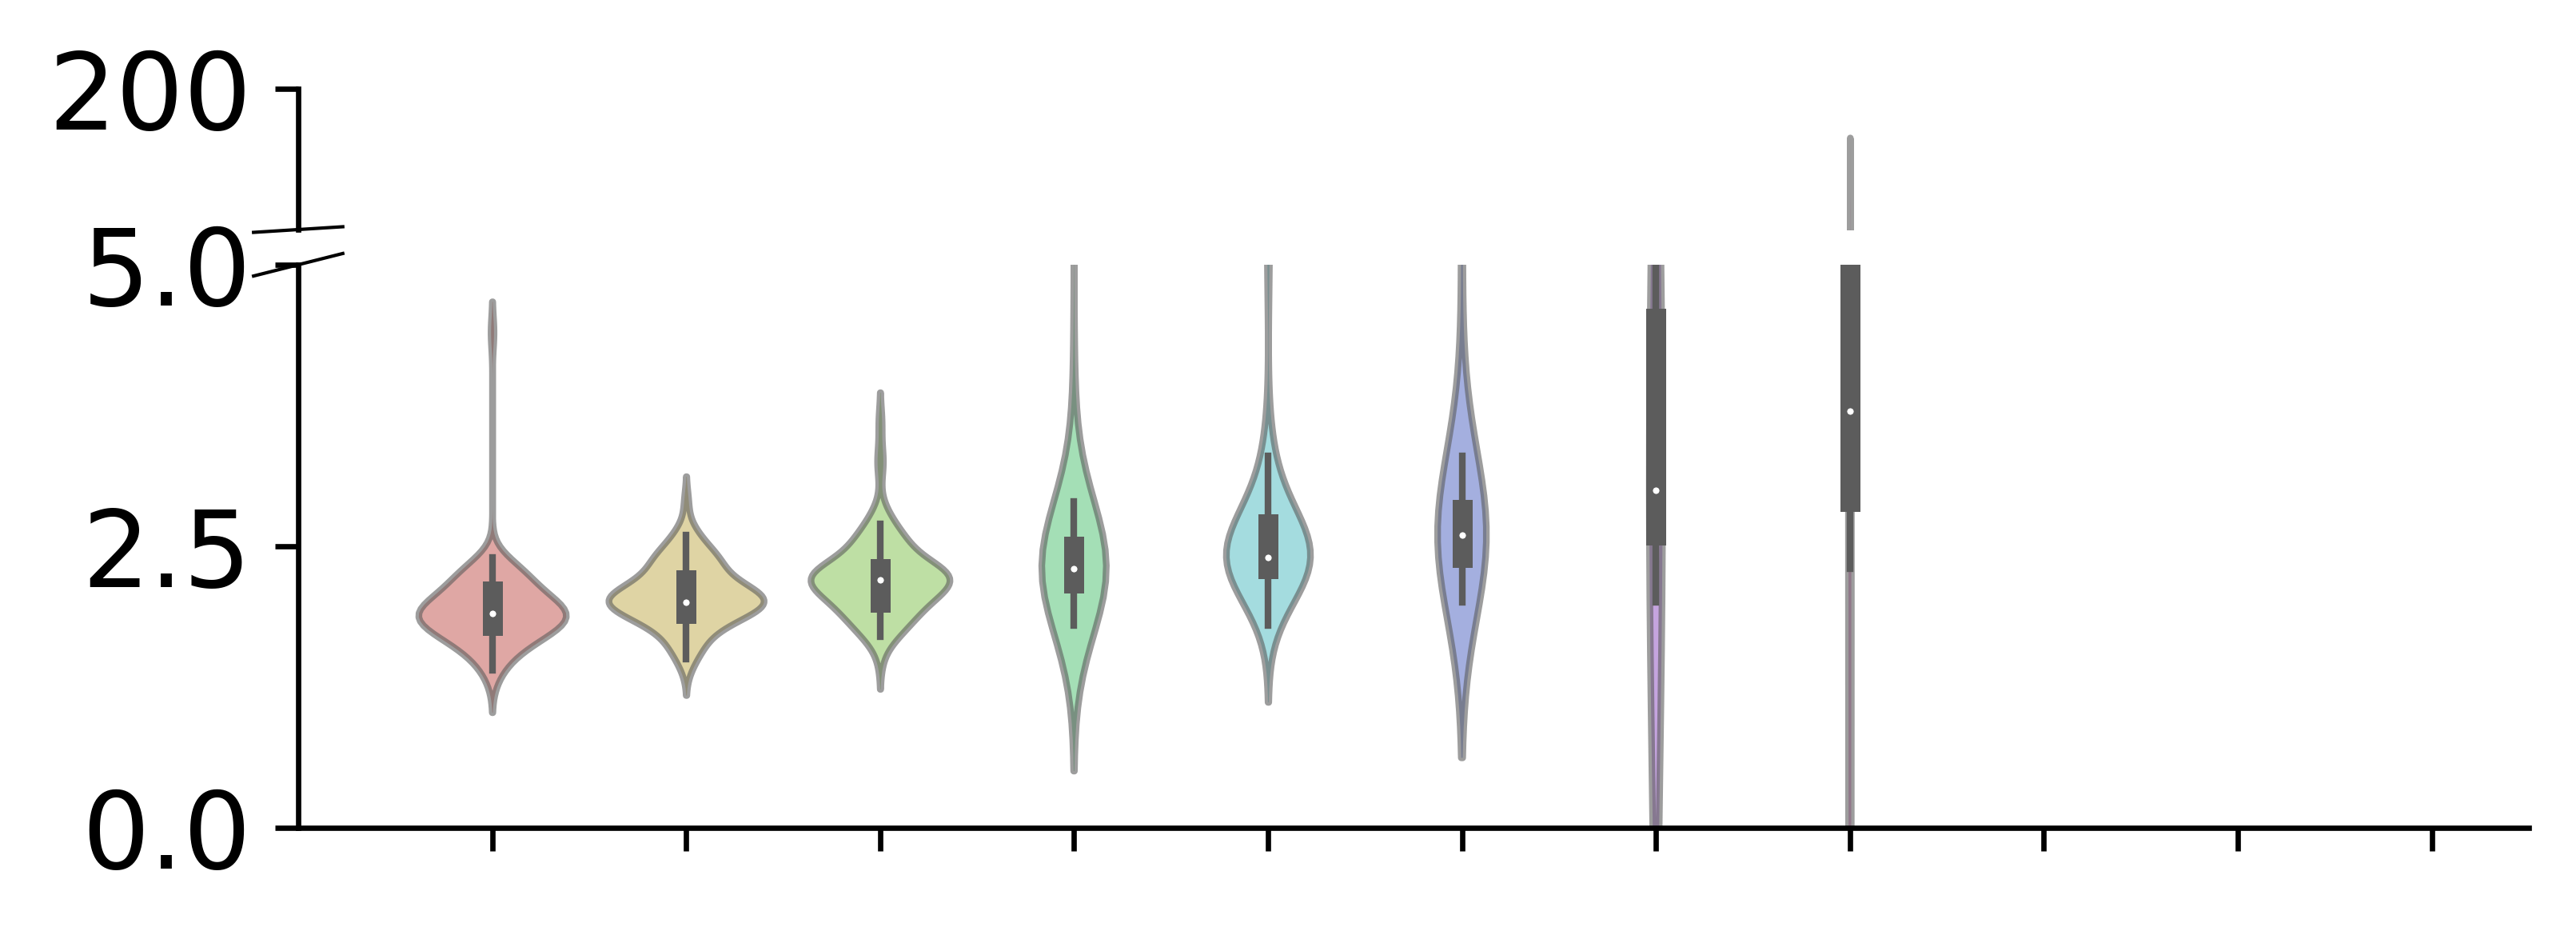

df_ct_r_n20
        0.0       0.1       0.2       0.3       0.4      0.5       0.6  \
0  1.935000  1.854000  1.811000  1.743000  1.679000  1.62200  1.570000   
1  0.342746  0.262076  0.282098  0.236751  0.216469  0.21428  0.228254   

        0.7       0.8       0.9       1.0  
0  1.507000  1.439000  1.382000  1.314000  
1  0.224613  0.224898  0.214653  0.201007  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


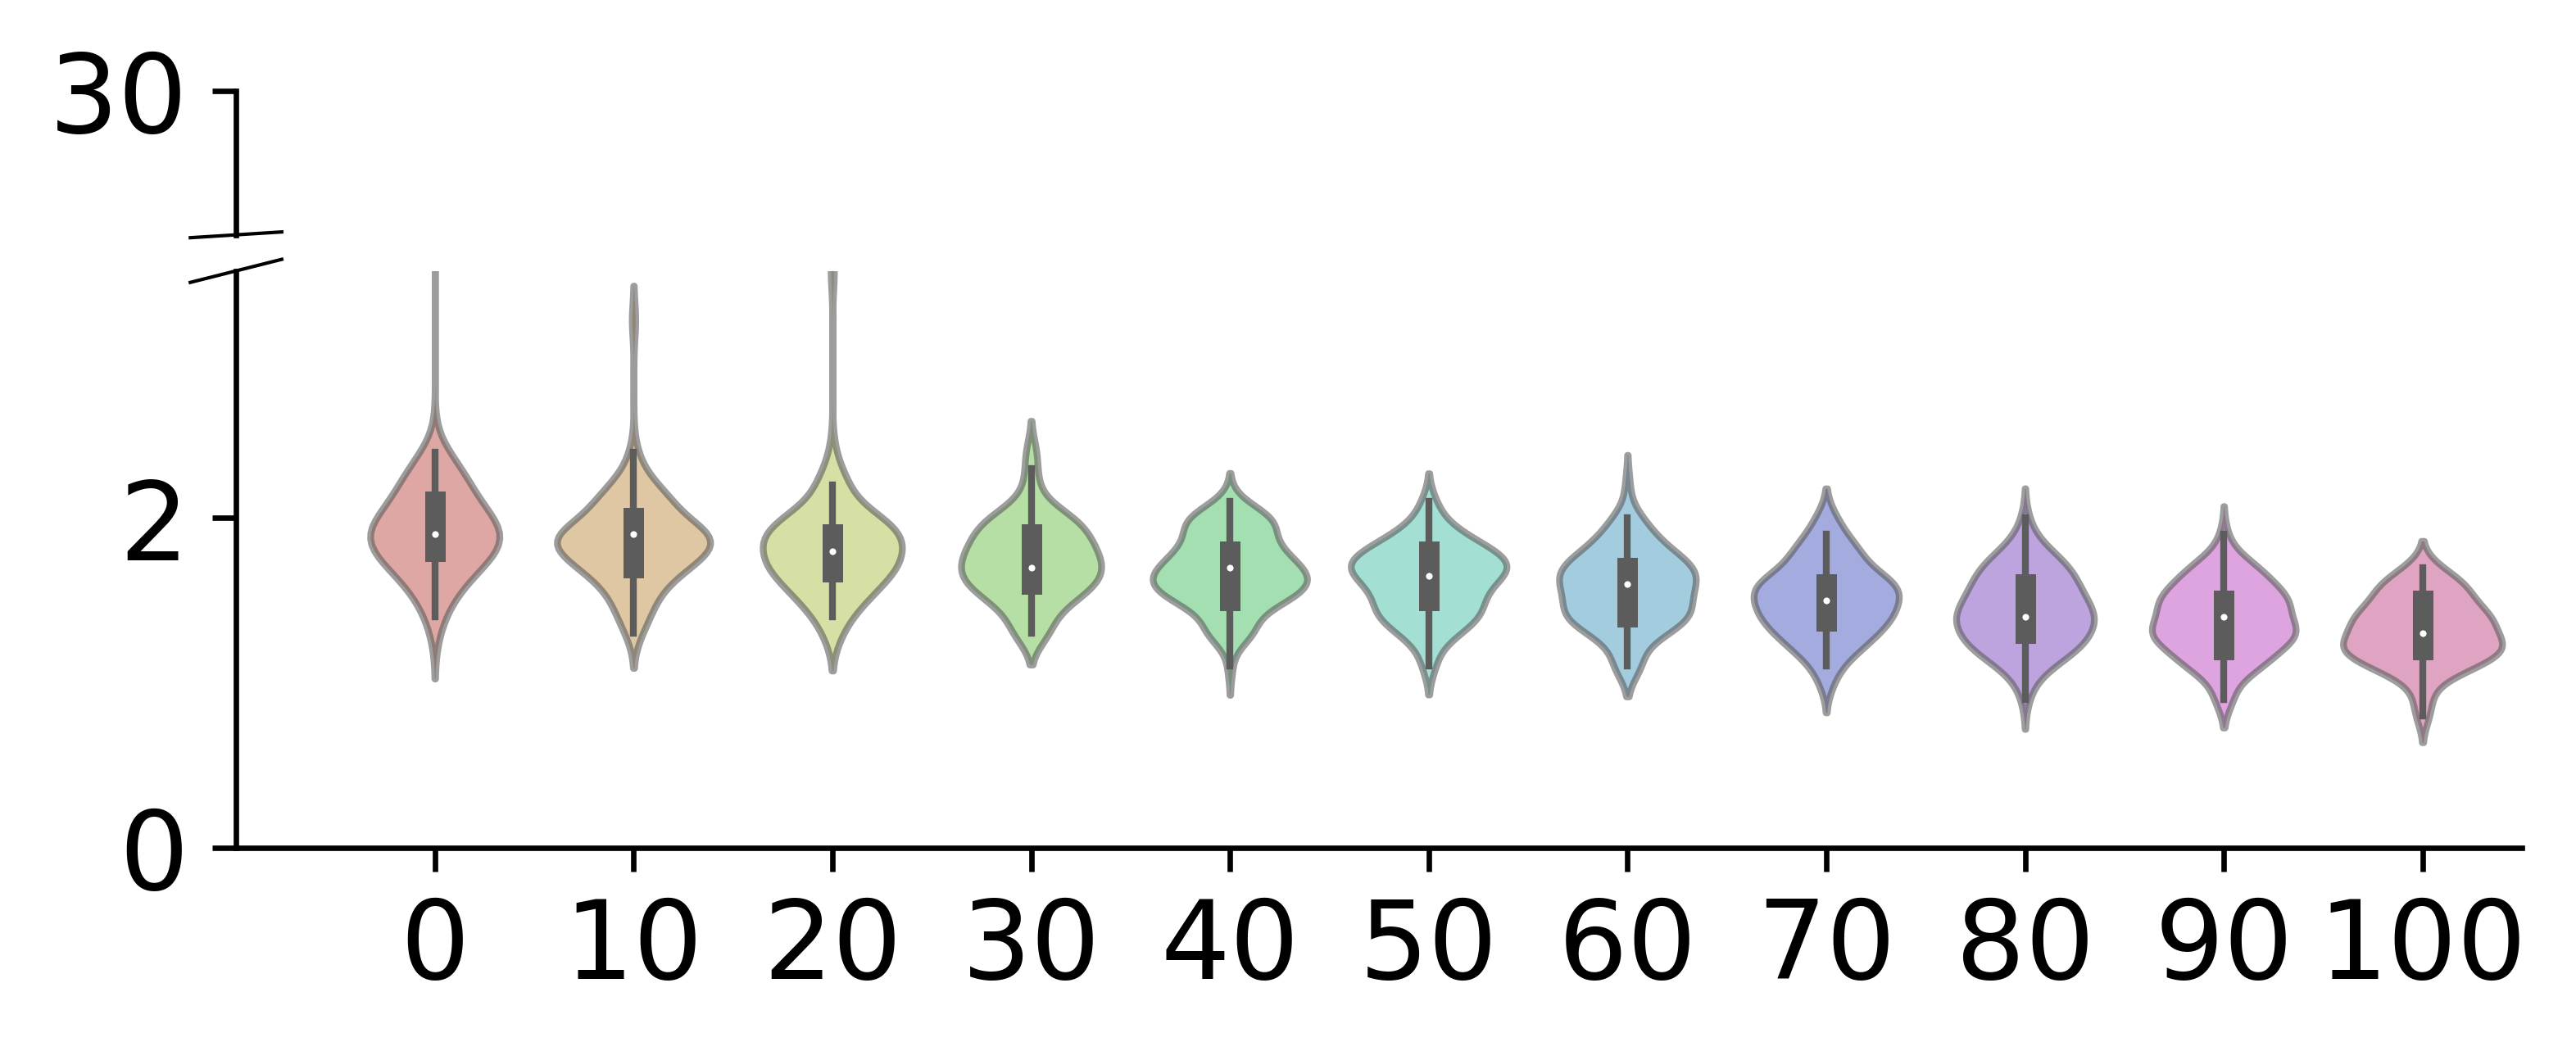

df_ct_all_n50
        0.0       0.1       0.2       0.3       0.4       0.5       0.6
0  5.501000  4.773000  3.665000  3.522000  3.877000  4.563636  7.408140
1  5.712696  6.670635  3.043859  0.481784  0.592259  0.850960  7.166836


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


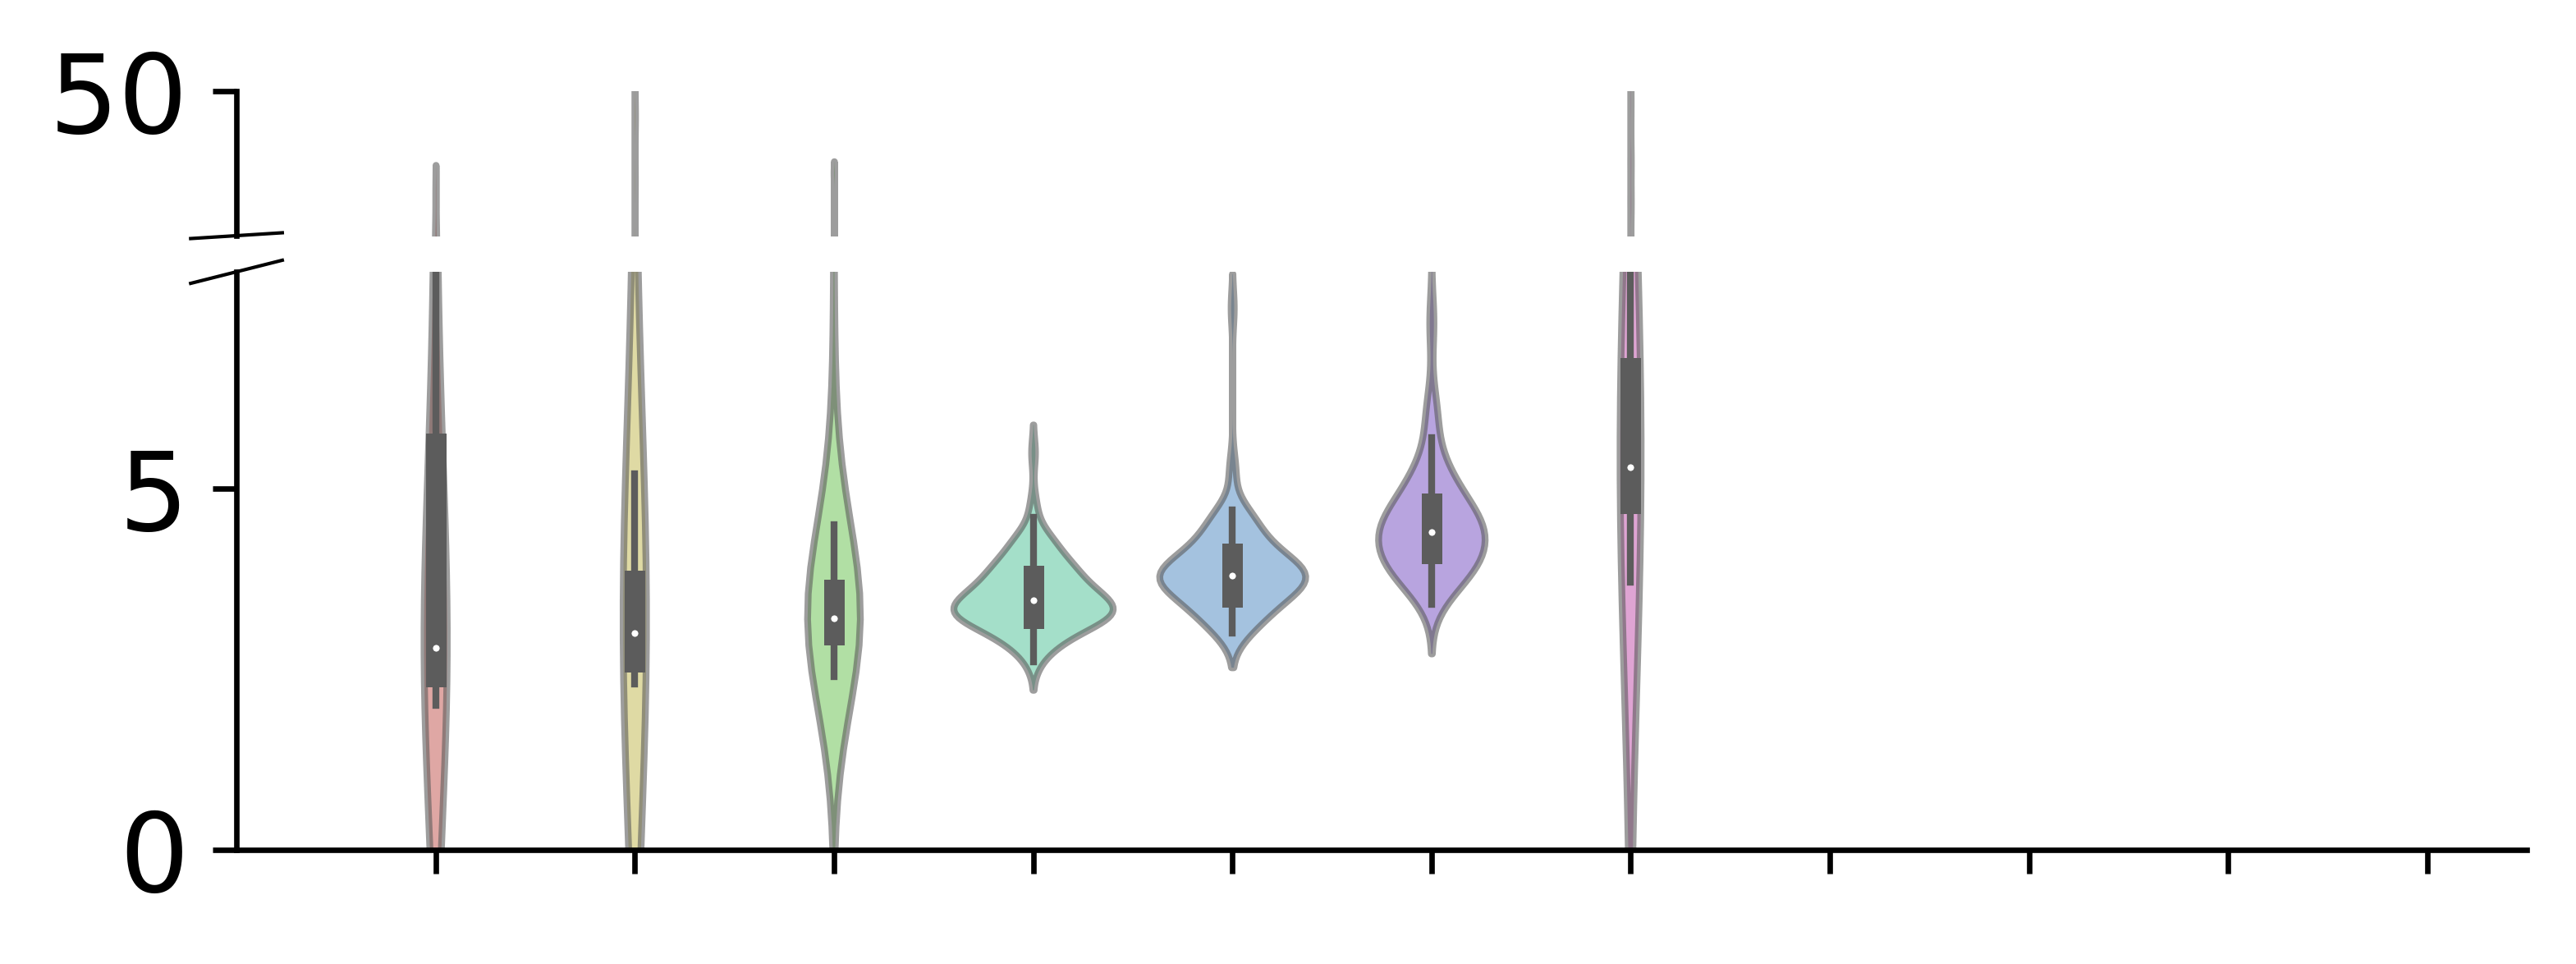

df_ct_a_n50
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0  5.501000  2.743000  2.552000  2.486000  2.456000  2.445000  2.438000   
1  5.712696  0.721007  0.280884  0.240008  0.228613  0.224221  0.218531   

        0.7     0.8       0.9       1.0  
0  2.434000  2.4340  2.438000  2.434000  
1  0.217816  0.2201  0.223061  0.222809  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


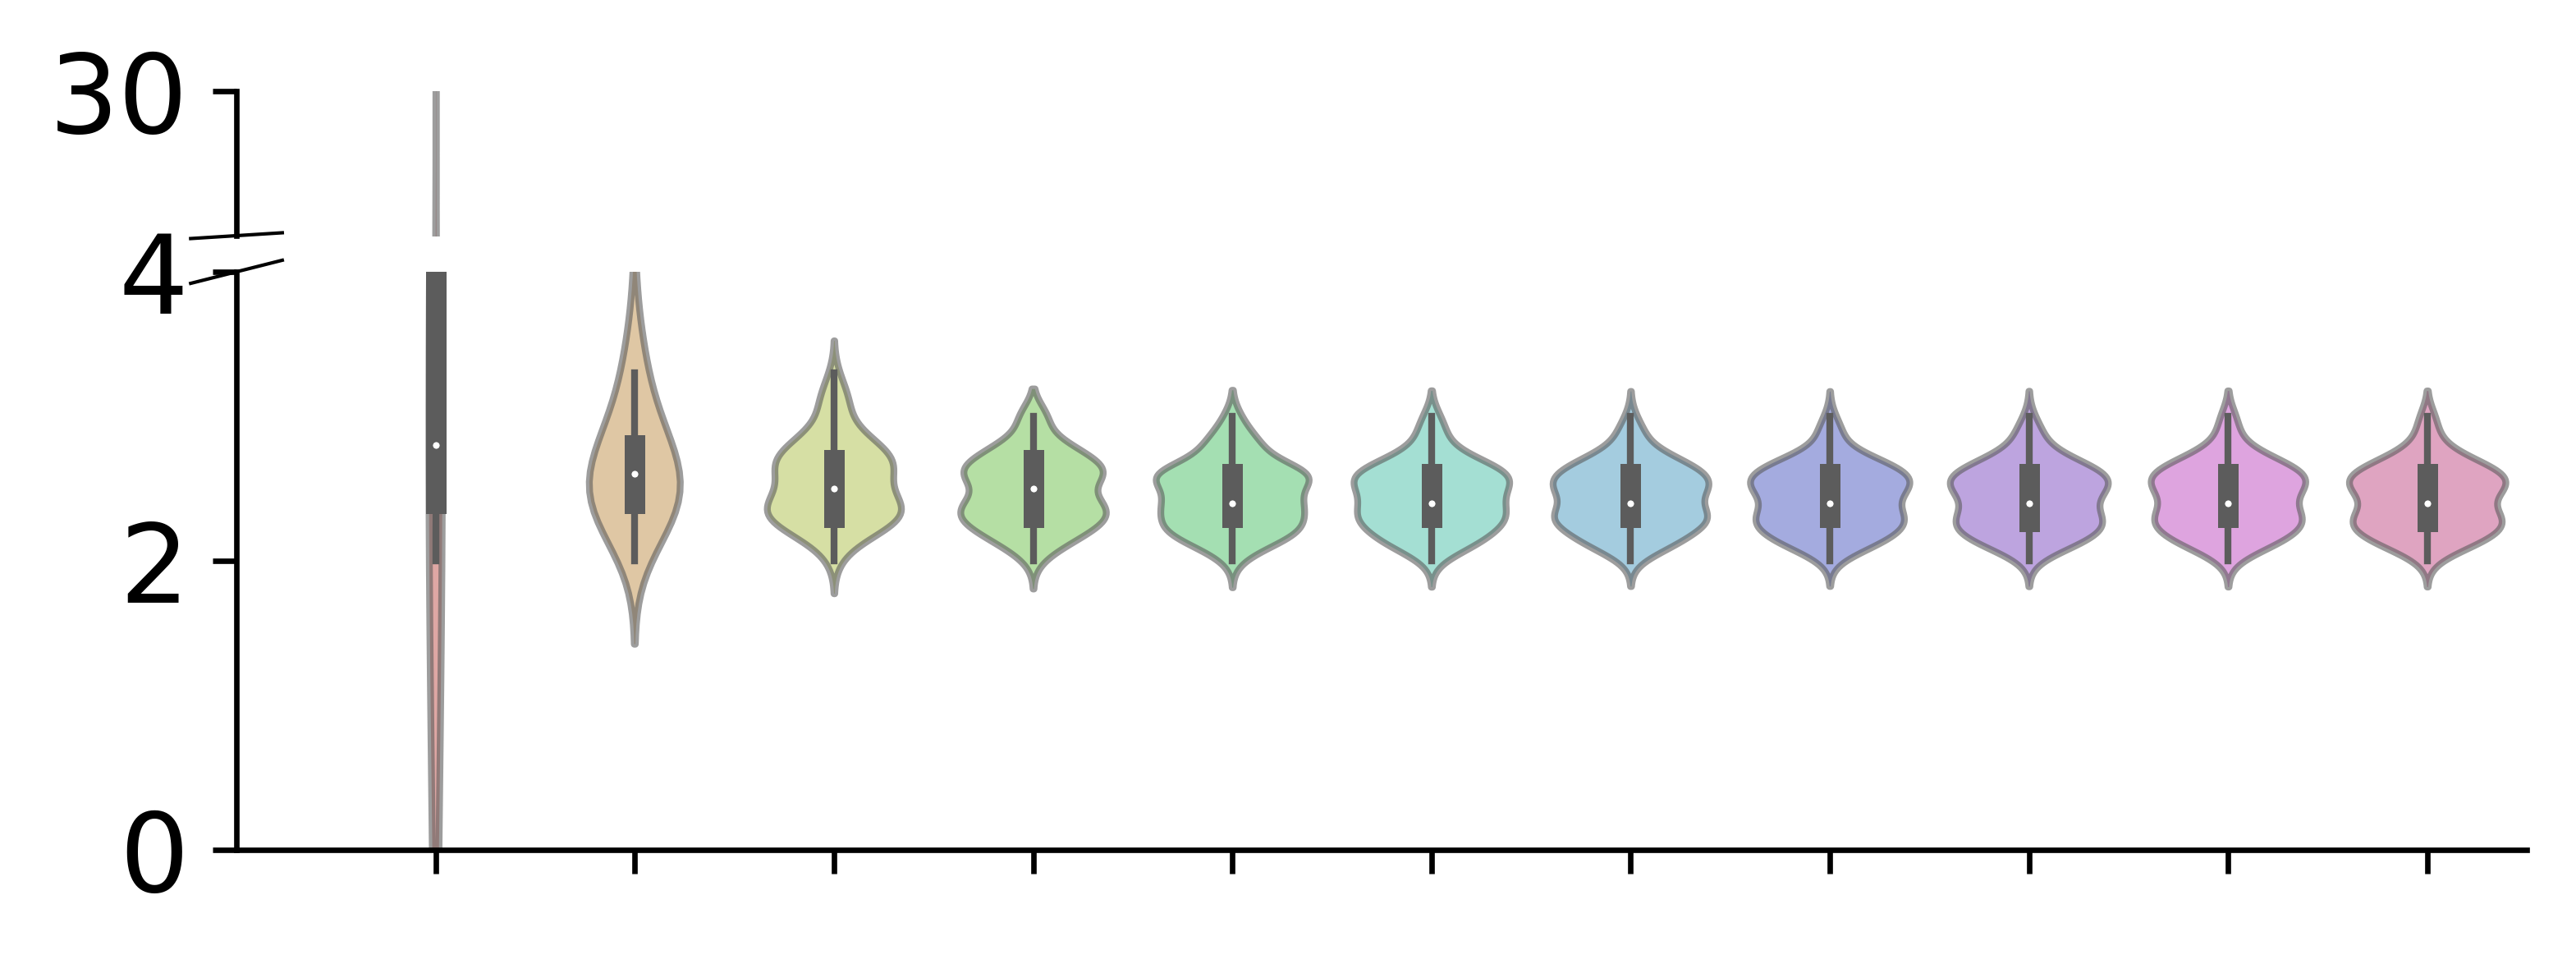

df_ct_o_n50
        0.0        0.1        0.2        0.3
0  5.501000  13.021000  24.308000  42.560000
1  5.712696  15.863015  27.850083  49.094349


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


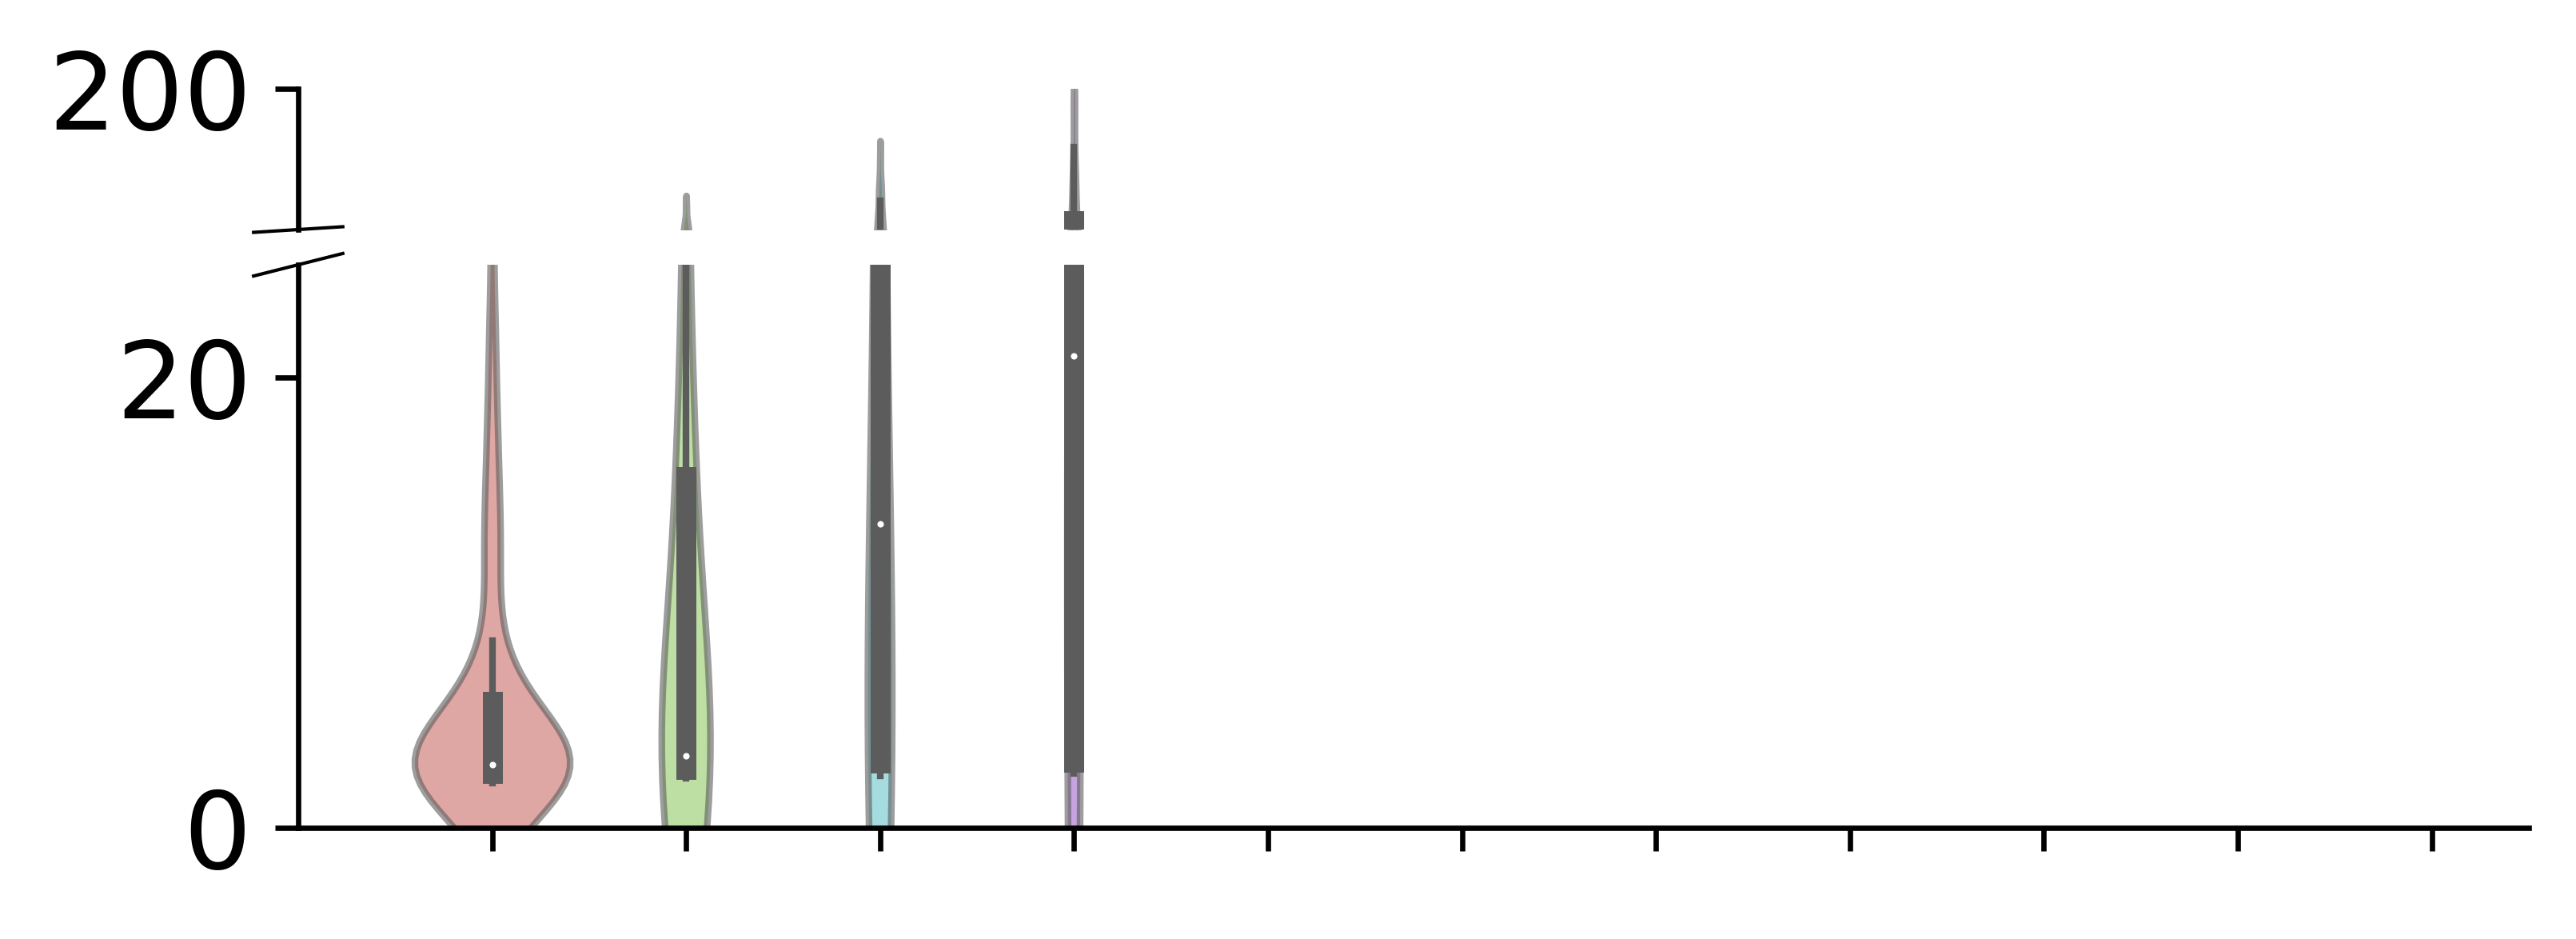

df_ct_r_n50
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0  5.501000  5.592000  4.917000  2.854000  2.319000  2.110000  1.861000   
1  5.712696  6.734147  6.558324  3.302497  1.645825  1.848486  0.459325   

        0.7       0.8    0.9       1.0  
0  1.730000  1.606000  1.504  1.415000  
1  0.357071  0.159261  0.128  0.118638  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


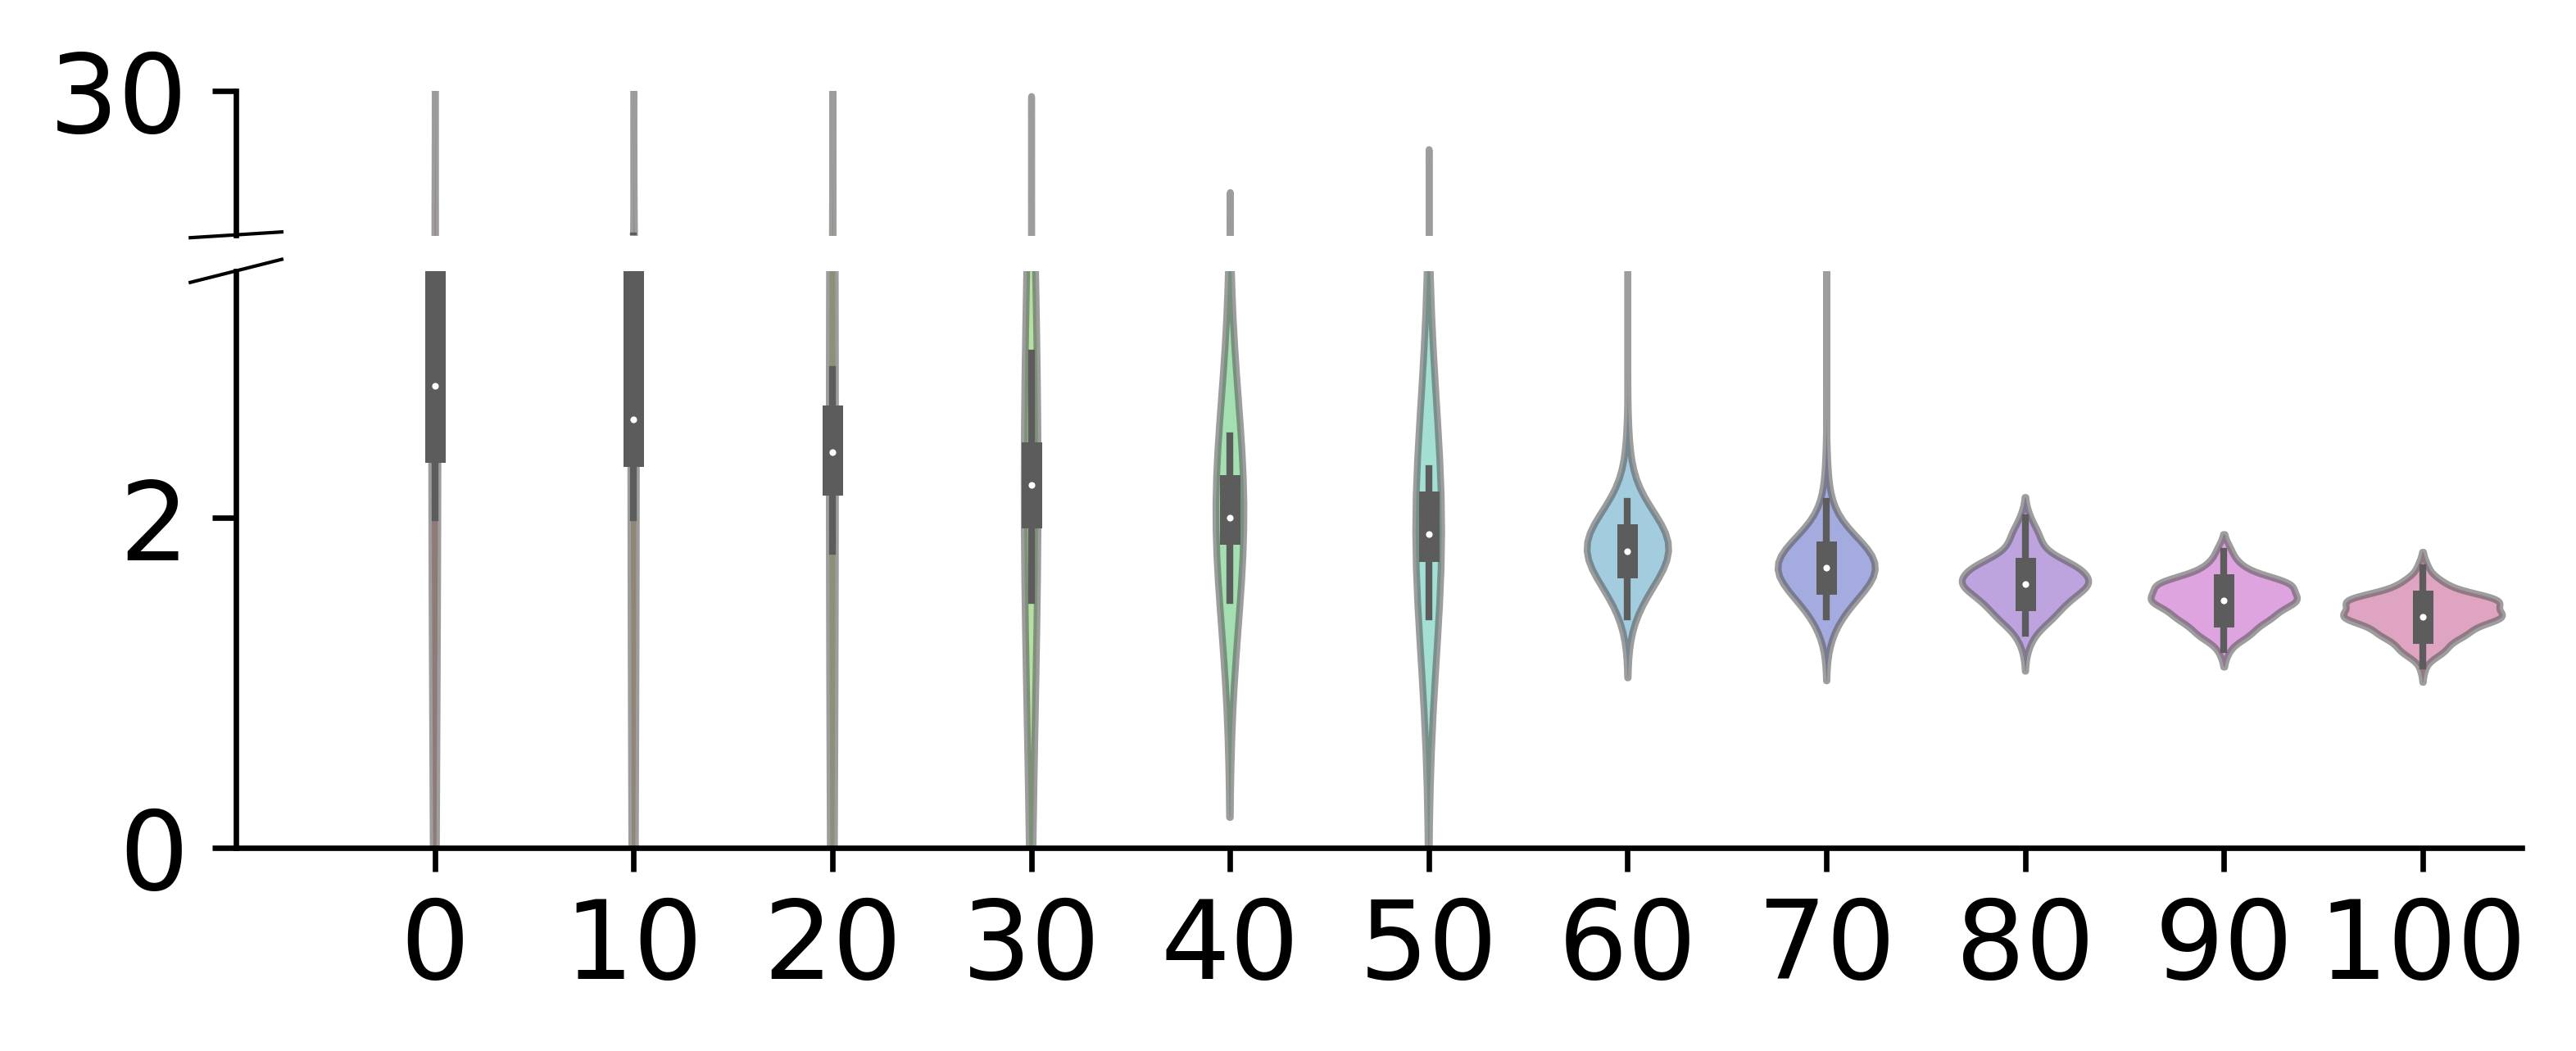

df_ct_all_n80
   0.0        0.1       0.2       0.3       0.4       0.5  0.6  0.7  0.8  0.9  \
0  NaN   8.447059  4.655000  4.360000  5.850000  5.461111  NaN  NaN  NaN  NaN   
1  NaN  17.707330  2.855604  0.756571  4.769119  0.773261  NaN  NaN  NaN  NaN   

   1.0  
0  NaN  
1  NaN  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


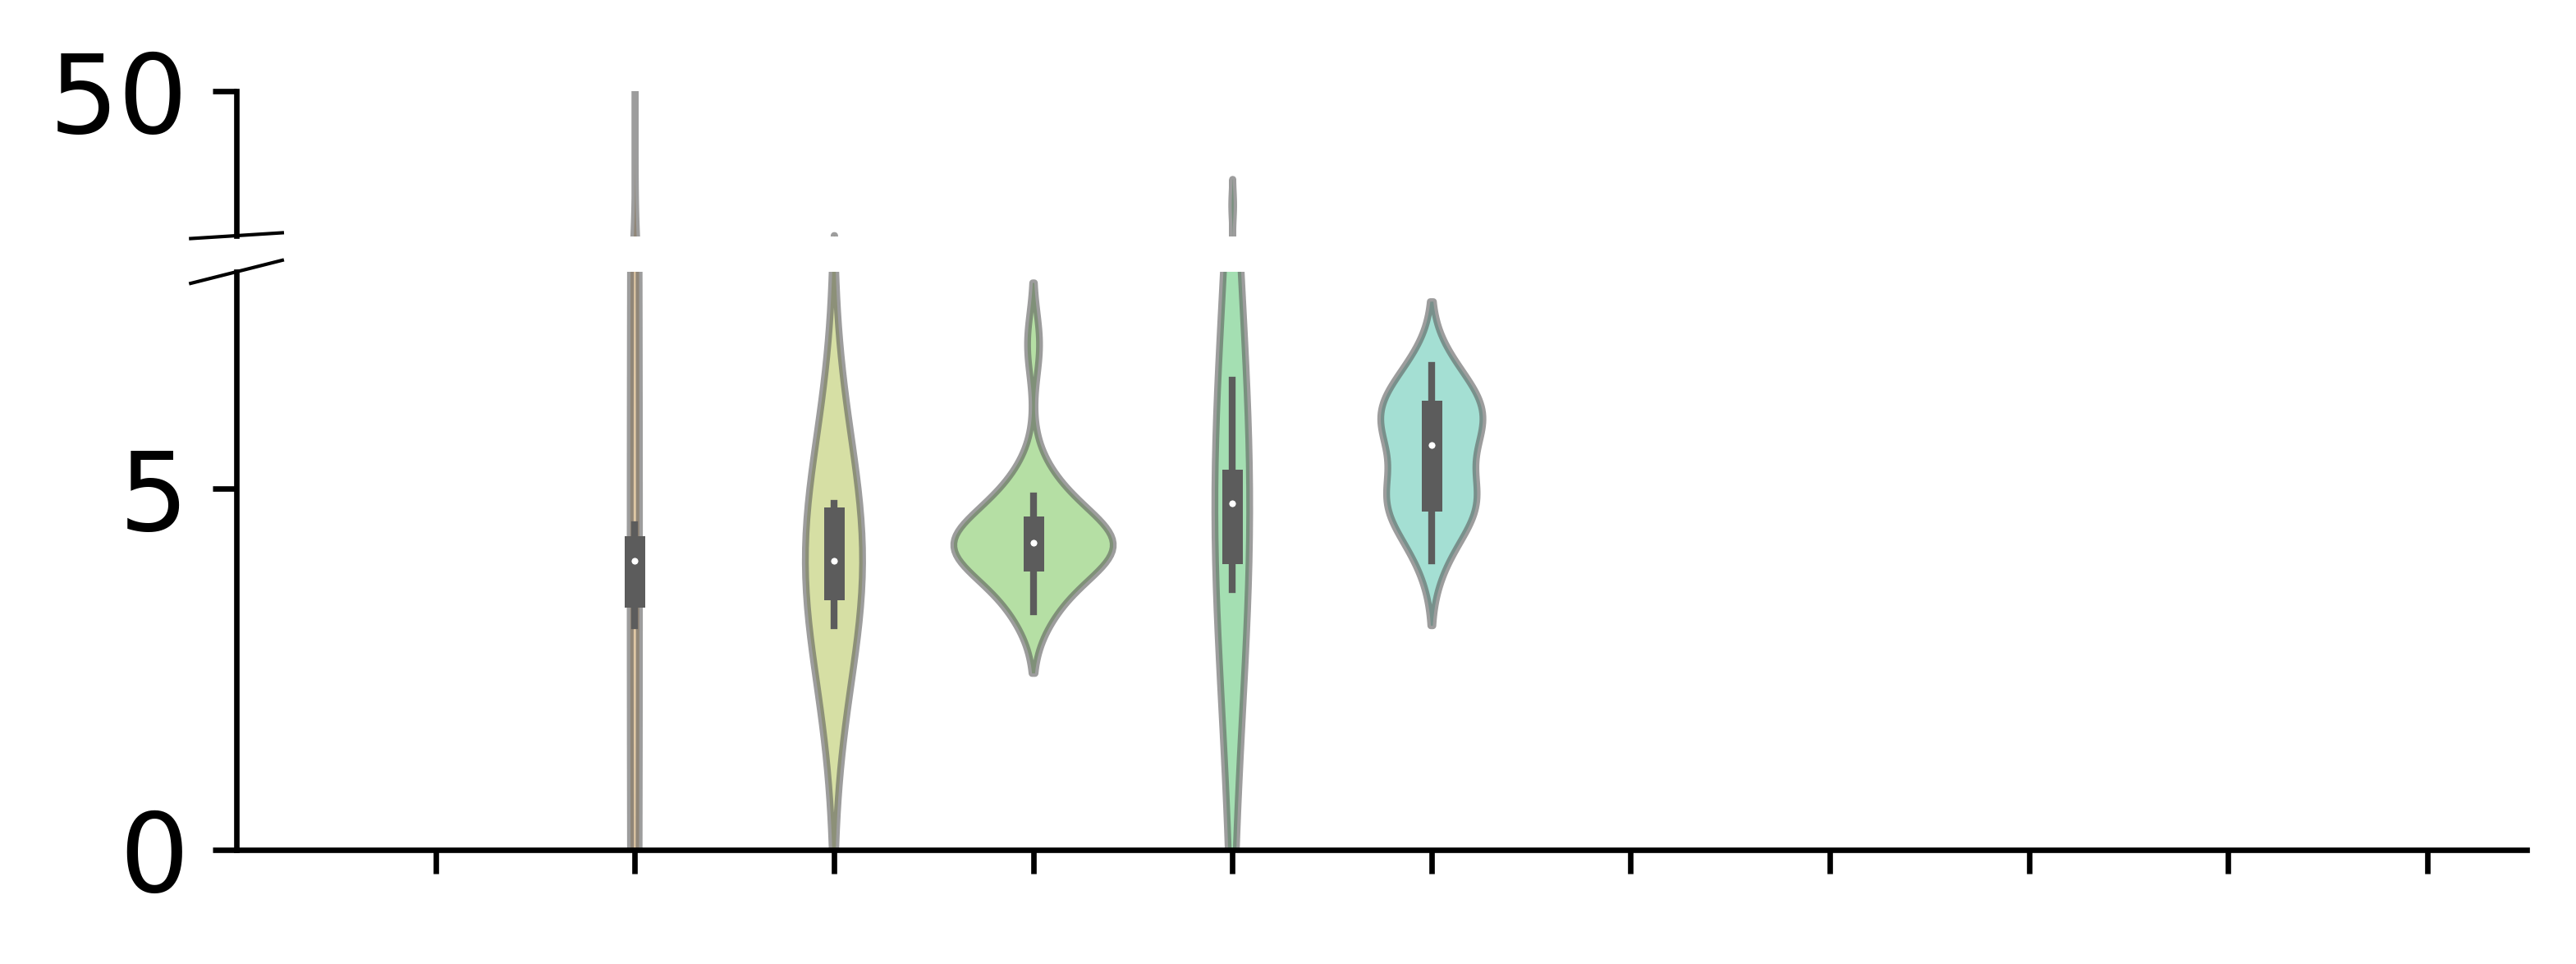

df_ct_a_n80
   0.0        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
0  NaN   7.465000  3.185000  3.045000  2.975000  2.935000  2.900000  2.895000   
1  NaN  12.664923  0.359548  0.295762  0.268095  0.237224  0.232379  0.243875   

        0.8      0.9       1.0  
0  2.890000  2.88500  2.885000  
1  0.238537  0.24551  0.230814  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


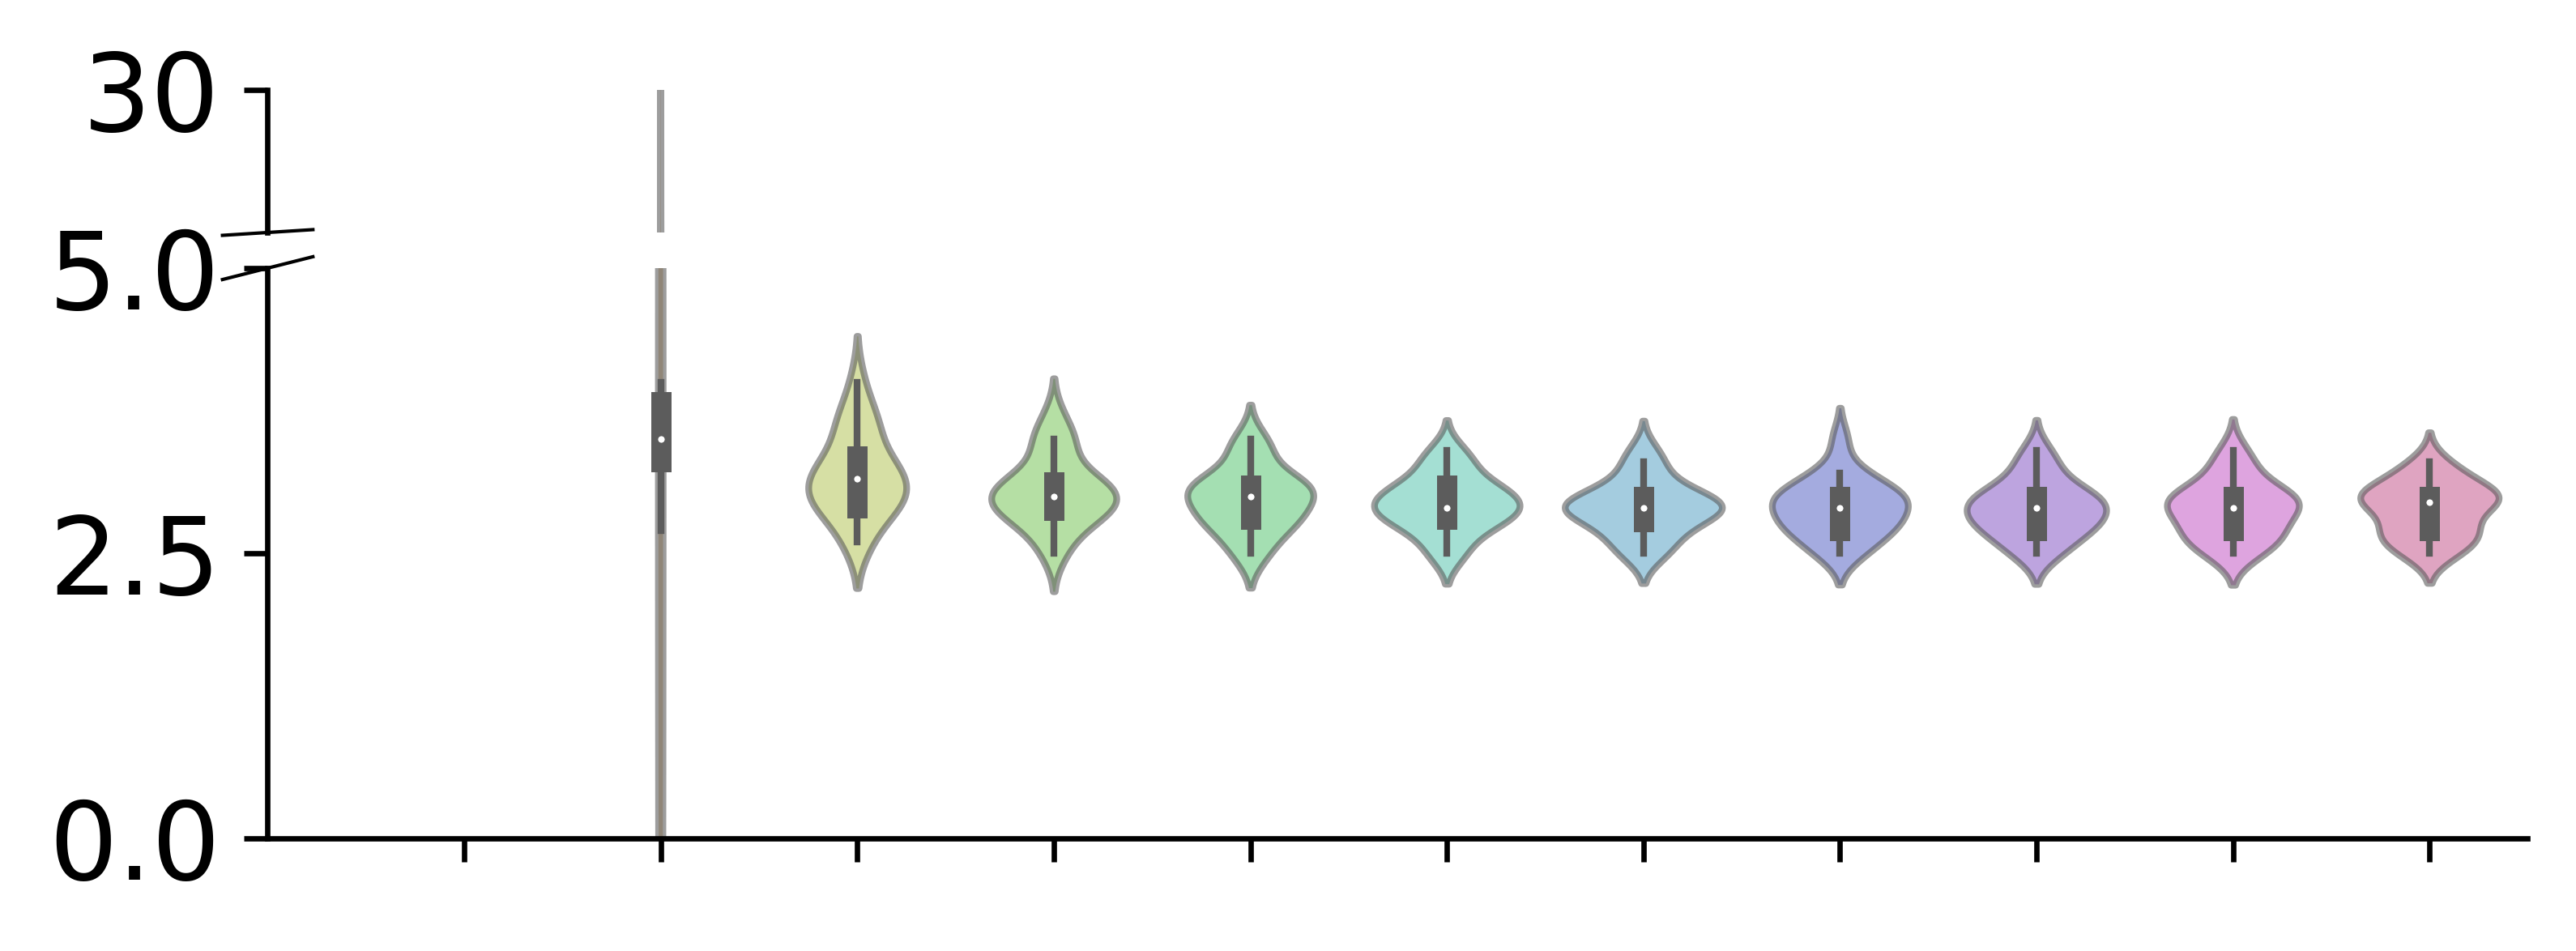

df_ct_o_n80
   0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.0
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


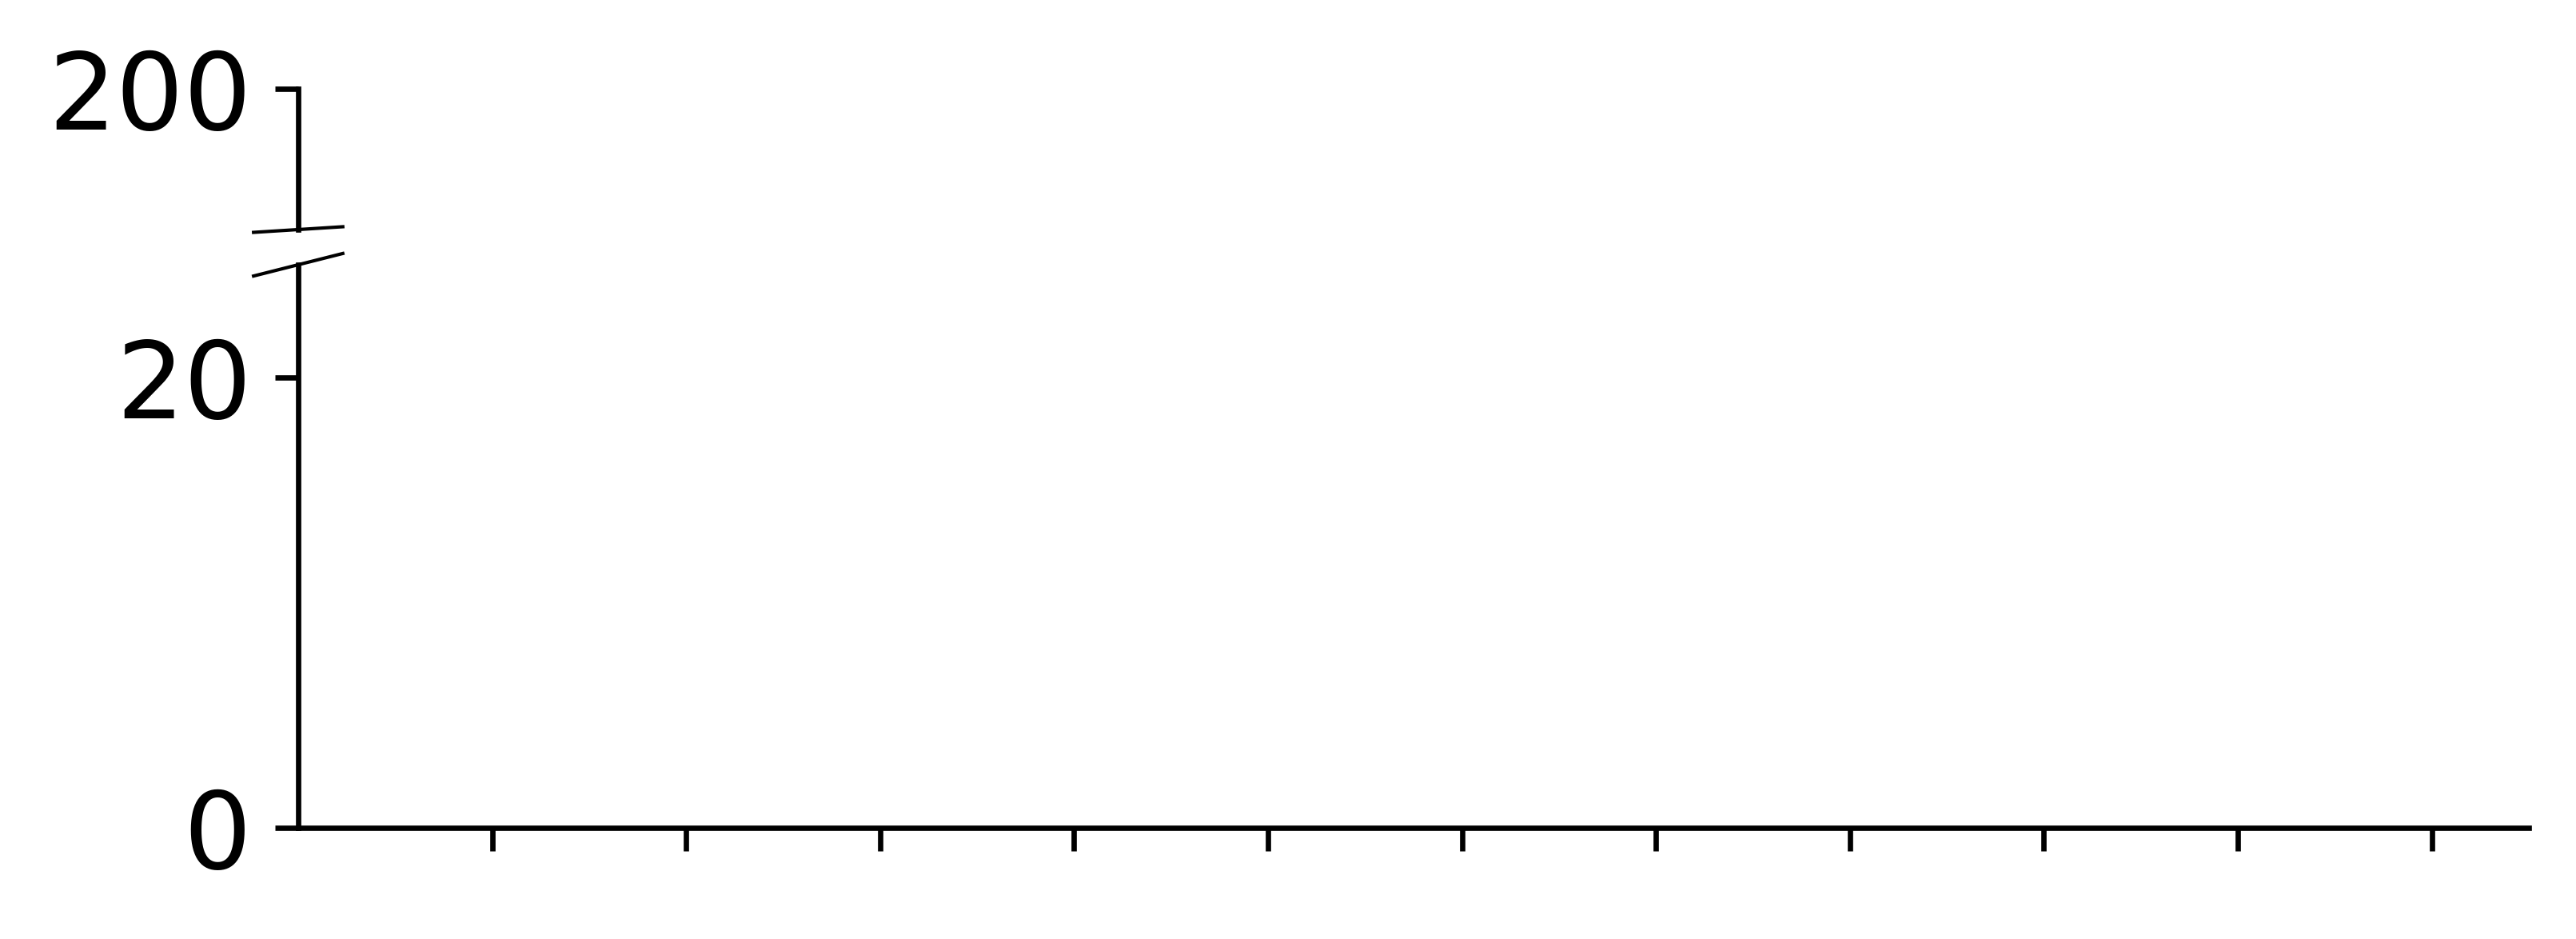

df_ct_r_n80
   0.0  0.1        0.2  0.3        0.4       0.5       0.6       0.7  \
0  NaN  NaN  24.376471  NaN  20.770000  5.230000  2.105000  1.895000   
1  NaN  NaN  47.610386  NaN  39.748863  8.596924  0.210891  0.182962   

        0.8      0.9       1.0  
0  1.740000  1.61500  1.510000  
1  0.149666  0.14239  0.104403  


/var/folders/pj/0wvrjnhs2rb0v5g1bmchsyjw0000gn/T/ipykernel_62523/3015629783.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


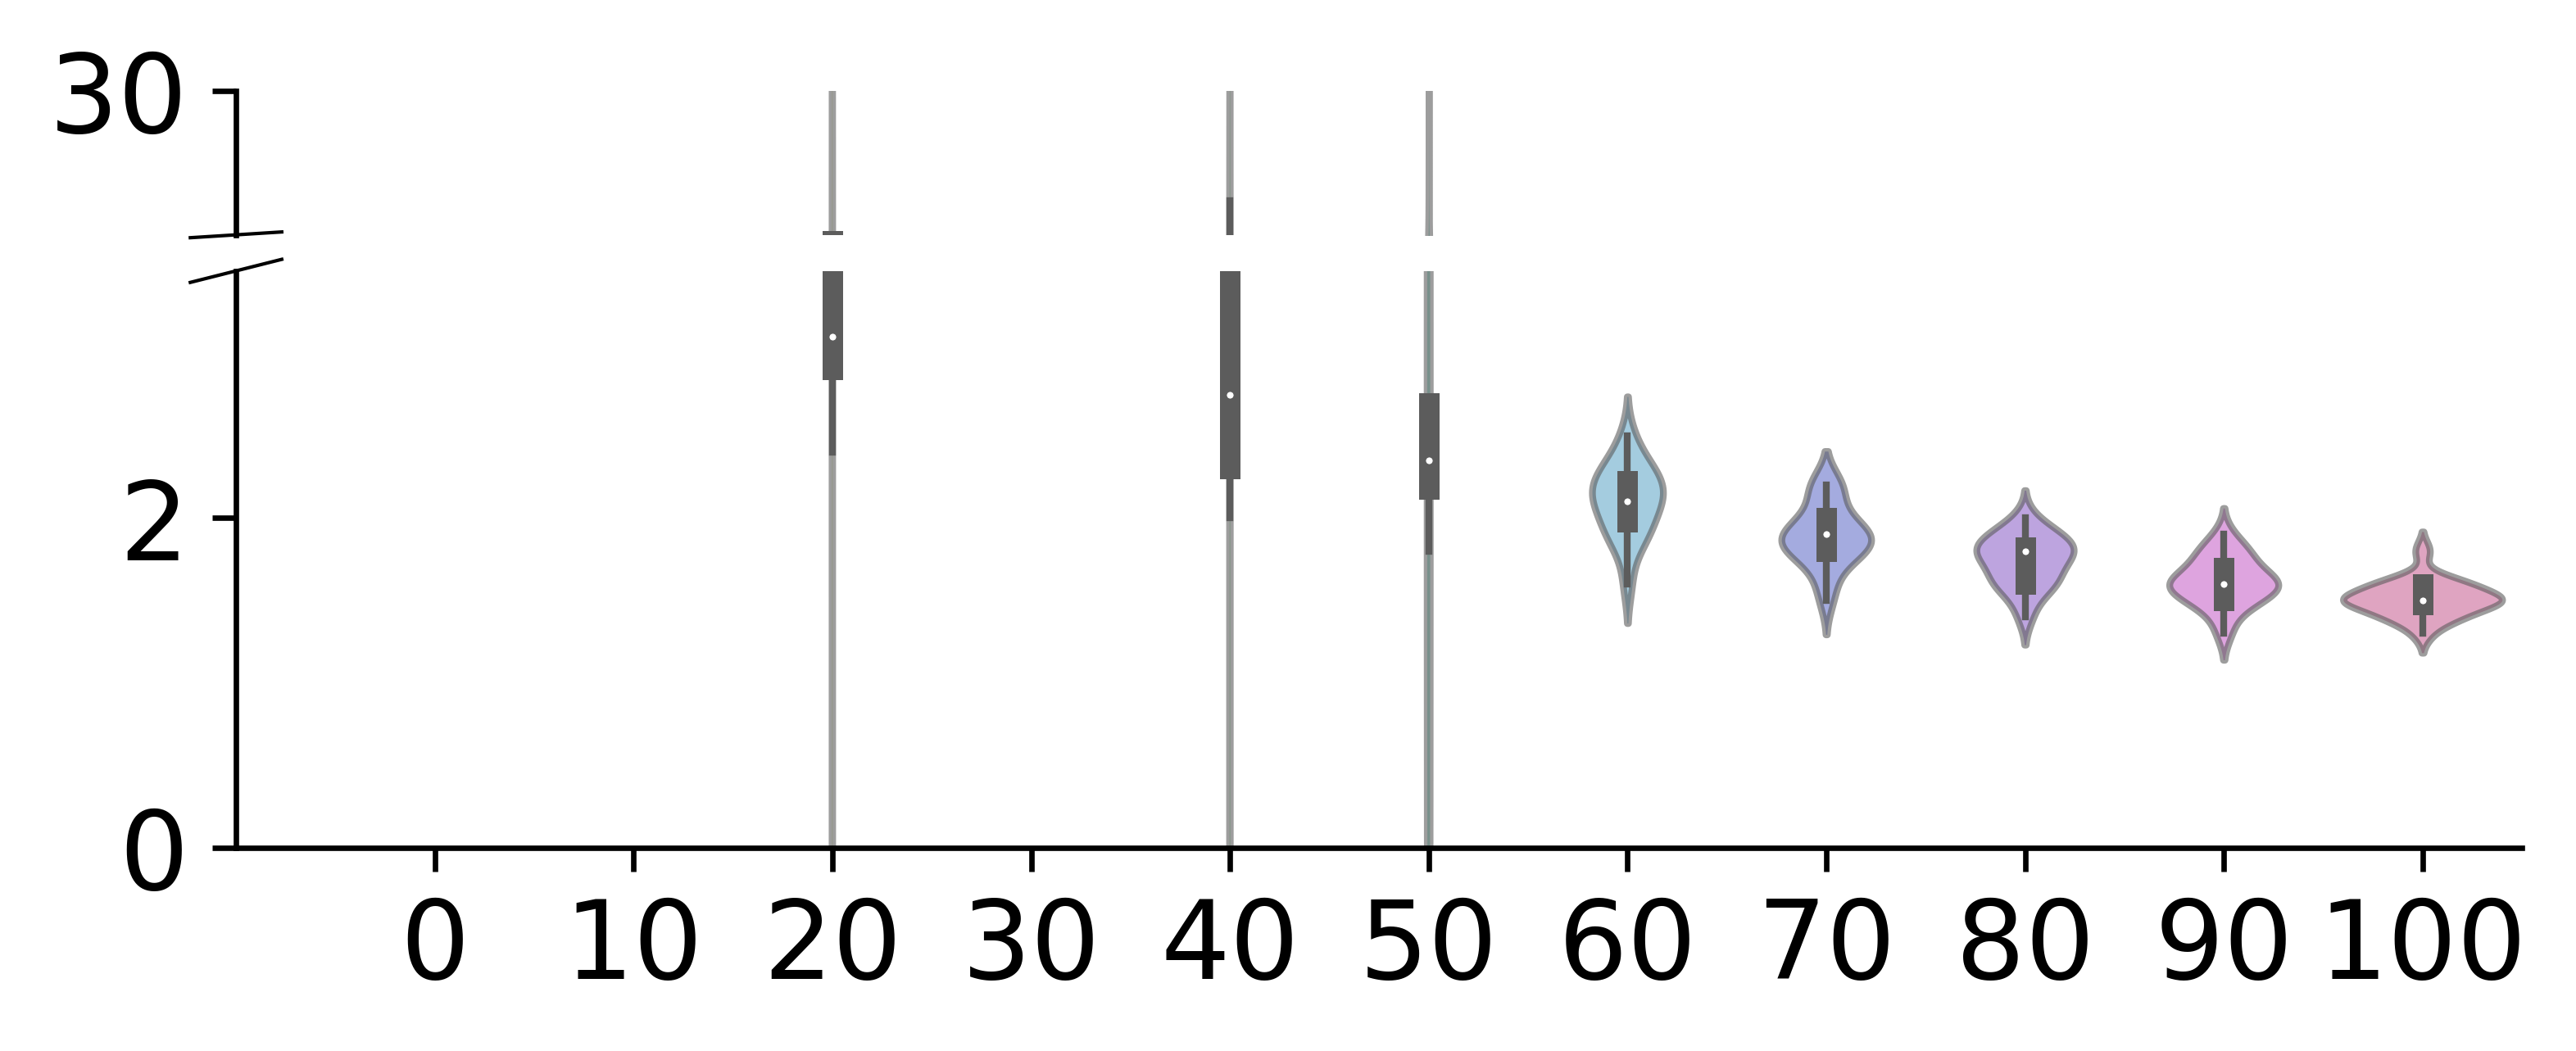

In [35]:
def plot_breakable_violin(name='df_ct_all_n20',height_ratios=[1,4],ylim=[10, 15],ylim2=[0, 6]):

    fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 2), dpi=600,
                                gridspec_kw={'height_ratios': height_ratios, 'hspace': 0.1})

    data_stats = {}
    for index, (key, value) in enumerate(dataframes[name].items()):
        mean = np.mean(value)
        std = np.std(value)
        data_stats[key] = [mean,std]
    
            
    print(name)
    print(pd.DataFrame(data_stats))
    
    # Plot the same data on both axes
    sns.violinplot(data=dataframes[name], ax=ax,alpha=0.3, edgecolor='black', linewidth=1, palette='hls')
    sns.violinplot(data=dataframes[name], ax=ax2, alpha=0.3,edgecolor='black', linewidth=1, palette='hls')

    
    
        
    # Adjusting the transparency for the violins on both axes
    for ax_i in [ax, ax2]:
        for child in ax_i.get_children():
            if isinstance(child, collections.PolyCollection):
                child.set_alpha(0.6)

    # Set the y-axis view limits
    if height_ratios[0] < height_ratios[1]:
        ax.set_ylim(ylim[0], ylim[1])  # Adjust these values based on your dataset
        ax.set_yticks([ylim[1]])  # Set the y-ticks for the top axes
        # ax.set_yticklabels(['15'])  # Set the y-tick labels for the top axes
        ax2.set_ylim(ylim2[0],ylim2[1])  # Adjust these values based on your dataset
    else:
        ax.set_ylim(ylim[0],ylim[1])  # Adjust these values based on your dataset
        ax2.set_ylim(ylim2[0], ylim2[1])  # Adjust these values based on your dataset
        ax2.set_yticks([ylim2[0]])  # Set the y-ticks for the top axes
        # ax2.set_yticklabels(['15'])  # Set the y-tick labels for the top axes

    # Hide the spines and ticks of the upper plot
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(bottom=False)  # Don't show the bottom ticks
    # ax.xaxis.tick_top()
    ax.tick_params(labeltop=False)  # Don't show the top tick labels
    ax.spines['top'].set_visible(False)  # Hide the top spine
    ax.spines['right'].set_visible(False)  # Hide the right spine
    # Hide the top spine of the lower plot
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)  # Hide the right spine
    # Add diagonal lines to signify that the y-axis is broken
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False, lw=0.5)
    ax.plot((-0.02, +0.02), (-0.02, +0.02), **kwargs)  # top-left diagonal
    # ax.plot((1 - 0.02, 1 + 0.02), (-0.02, +0.02), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-0.02, +0.02), (1 - 0.02, 1 + 0.02), **kwargs)  # bottom-left diagonal
    # ax2.plot((1 - 0.02, 1 + 0.02), (1 - 0.02, 1 + 0.02), **kwargs)  # bottom-right diagonal

    # Set x-ticks and tick labels, including an extra tick '1.0'
    # xticks = list(range(len(df.columns)))  # Set x-ticks positions based on the number of columns
    # xticklabels = list(df.columns)  # Use column names as x-tick labels
    # xticklabels.append('1.0')  # Append an additional label '1.0' at the end
    # ax2.set_xticks(xticks + [len(xticks)])  # Apply the x-ticks to the bottom axes
    # ax2.set_xticklabels('')  # Apply the x-tick labels with rotation for readability

    xticks = range(11)  # Set x-ticks positions based on the number of columns
    ax.set_xlim(-1, 10.5)
    ax2.set_xticks(xticks)
    
    if '_r' not in name:
    # Apply empty x-tick labels
        ax2.set_xticklabels([''] * len(xticks))  # Pass an empty string for each x-tick
    else:
        # Apply x-tick labels that are 10 times the x-tick positions
        ax2.set_xticklabels([str(int(x) * 10) for x in xticks], rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax2.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
    plt.savefig('{:s}.png'.format(name),dpi=600,format='png',bbox_inches='tight',transparent=True)
    plt.show()

# plot_breakable_violin(name='df_ct_all_n20',ylim=[10, 15],ylim2=[0, 6])
# plot_breakable_violin(name='df_ct_o_n20',ylim=[20, 120],ylim2=[0, 8])

plot_breakable_violin(name='df_ct_all_n20',ylim=[20, 50],ylim2=[0, 6])
plot_breakable_violin(name='df_ct_a_n20',ylim=[20, 30],ylim2=[0, 3.2])
plot_breakable_violin(name='df_ct_o_n20',ylim=[50, 200],ylim2=[0, 5])
plot_breakable_violin(name='df_ct_r_n20',ylim=[10, 30],ylim2=[0, 3.5])

plot_breakable_violin(name='df_ct_all_n50',ylim=[20, 50],ylim2=[0, 8])
plot_breakable_violin(name='df_ct_a_n50',ylim=[20, 30],ylim2=[0, 4])
plot_breakable_violin(name='df_ct_o_n50',ylim=[50, 200],ylim2=[0, 25])
plot_breakable_violin(name='df_ct_r_n50',ylim=[10, 30],ylim2=[0, 3.5])

plot_breakable_violin(name='df_ct_all_n80',ylim=[20, 50],ylim2=[0, 8])
plot_breakable_violin(name='df_ct_a_n80',ylim=[20, 30],ylim2=[0, 5])
plot_breakable_violin(name='df_ct_o_n80',ylim=[50, 200],ylim2=[0, 25])
plot_breakable_violin(name='df_ct_r_n80',ylim=[10, 30],ylim2=[0, 3.5])



# plot_breakable_violin(name='df_energy_o_n20',ylim=[-2.6, 0],ylim2=[-15, -5],height_ratios=[4,1])

# plot_breakable_violin(name='df_energy_all_n50',ylim=[-8, 0],ylim2=[-30, -10],height_ratios=[4,1])
# plot_breakable_violin(name='df_energy_o_n50',ylim=[-8, 0],ylim2=[-50, -10],height_ratios=[4,1])
# plot_breakable_violin(name='df_energy_r_n50',ylim=[-4.2, 0],ylim2=[-15, -10],height_ratios=[4,1])

df_energy_all_n20
        0.0       0.1       0.2       0.3       0.4       0.5       0.6
0 -0.324888 -0.362104 -0.397223 -0.423909 -0.441004 -0.388632 -0.371905
1  0.091790  0.098390  0.091144  0.131246  0.137243  0.147568  0.214743


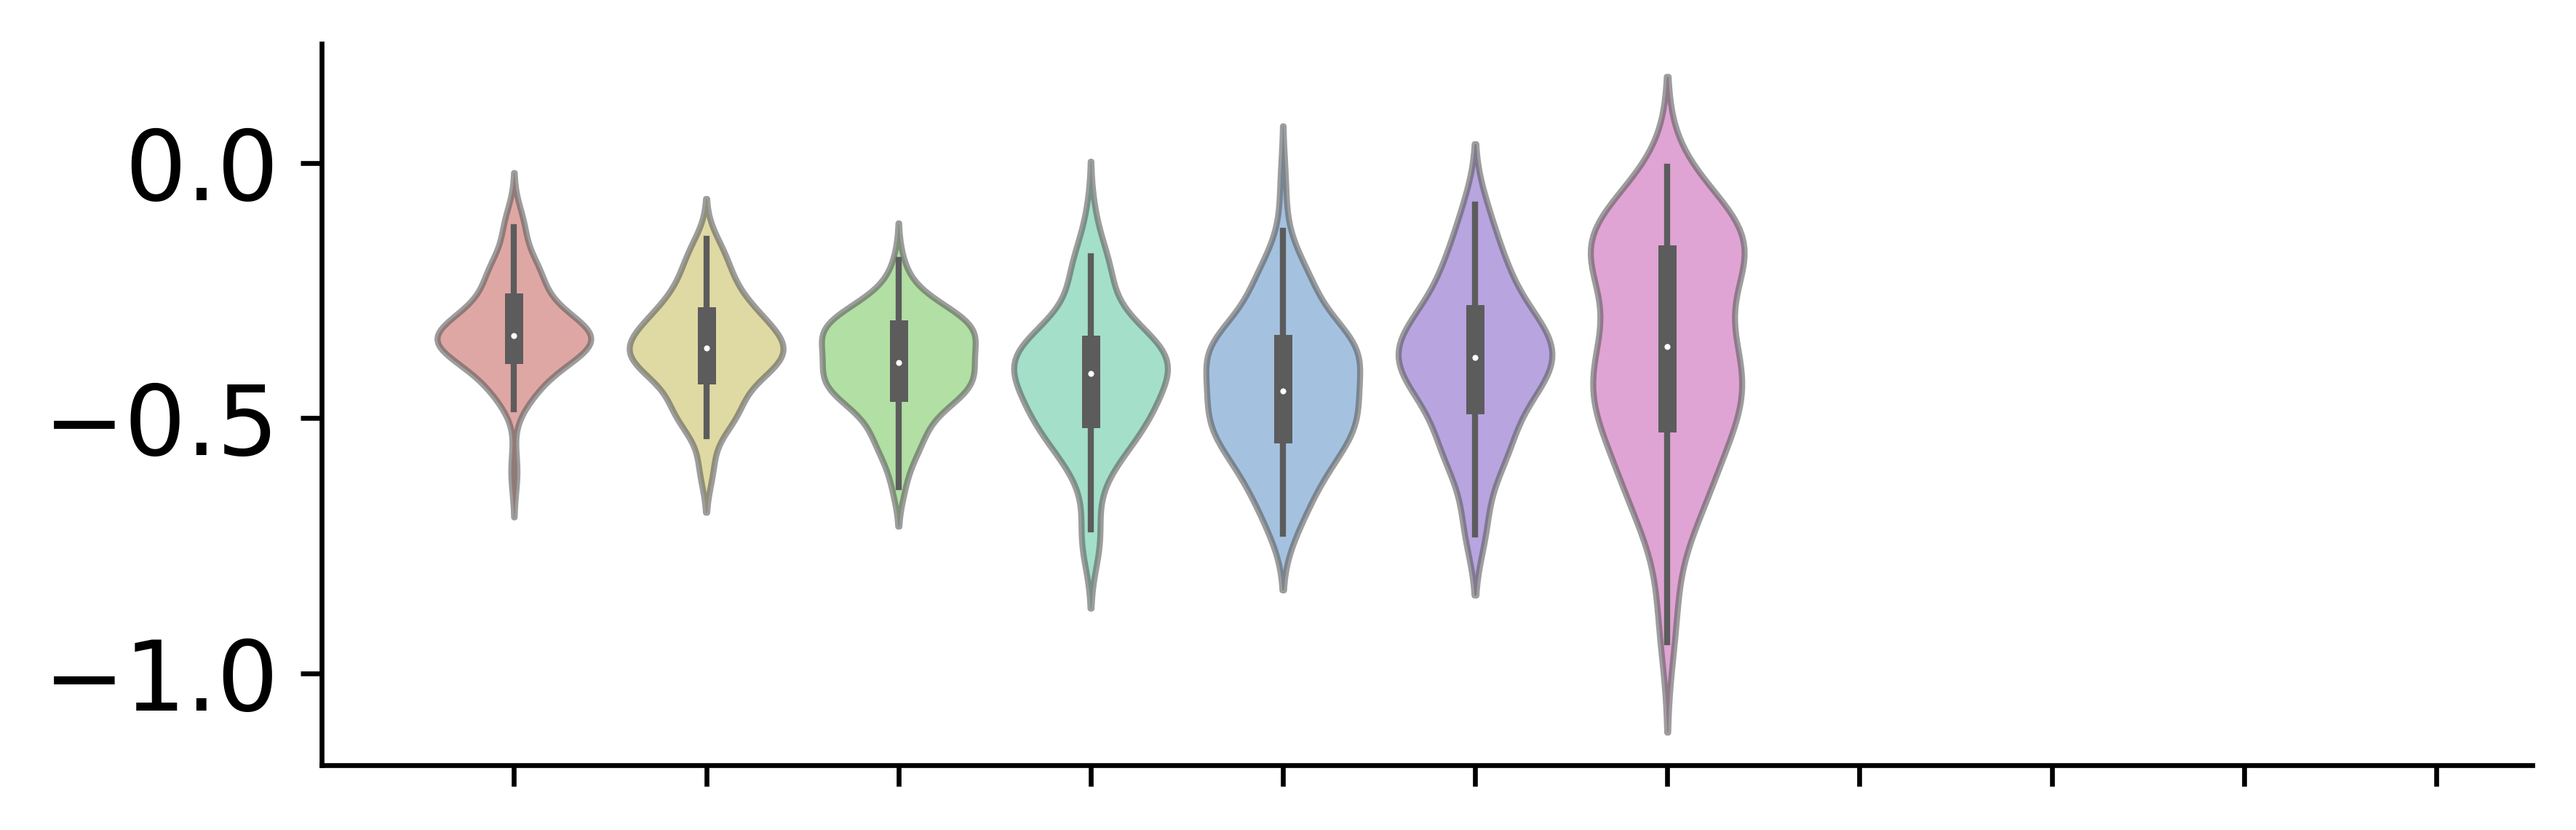

df_energy_a_n20
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0 -0.324888 -0.336764 -0.338518 -0.342834 -0.360078 -0.398089 -0.460422   
1  0.091790  0.101105  0.096844  0.111115  0.129034  0.155408  0.200013   

        0.7       0.8       0.9       1.0  
0 -0.549178 -0.707421 -0.865596 -0.049863  
1  0.244424  0.407456  0.410869  0.007030  


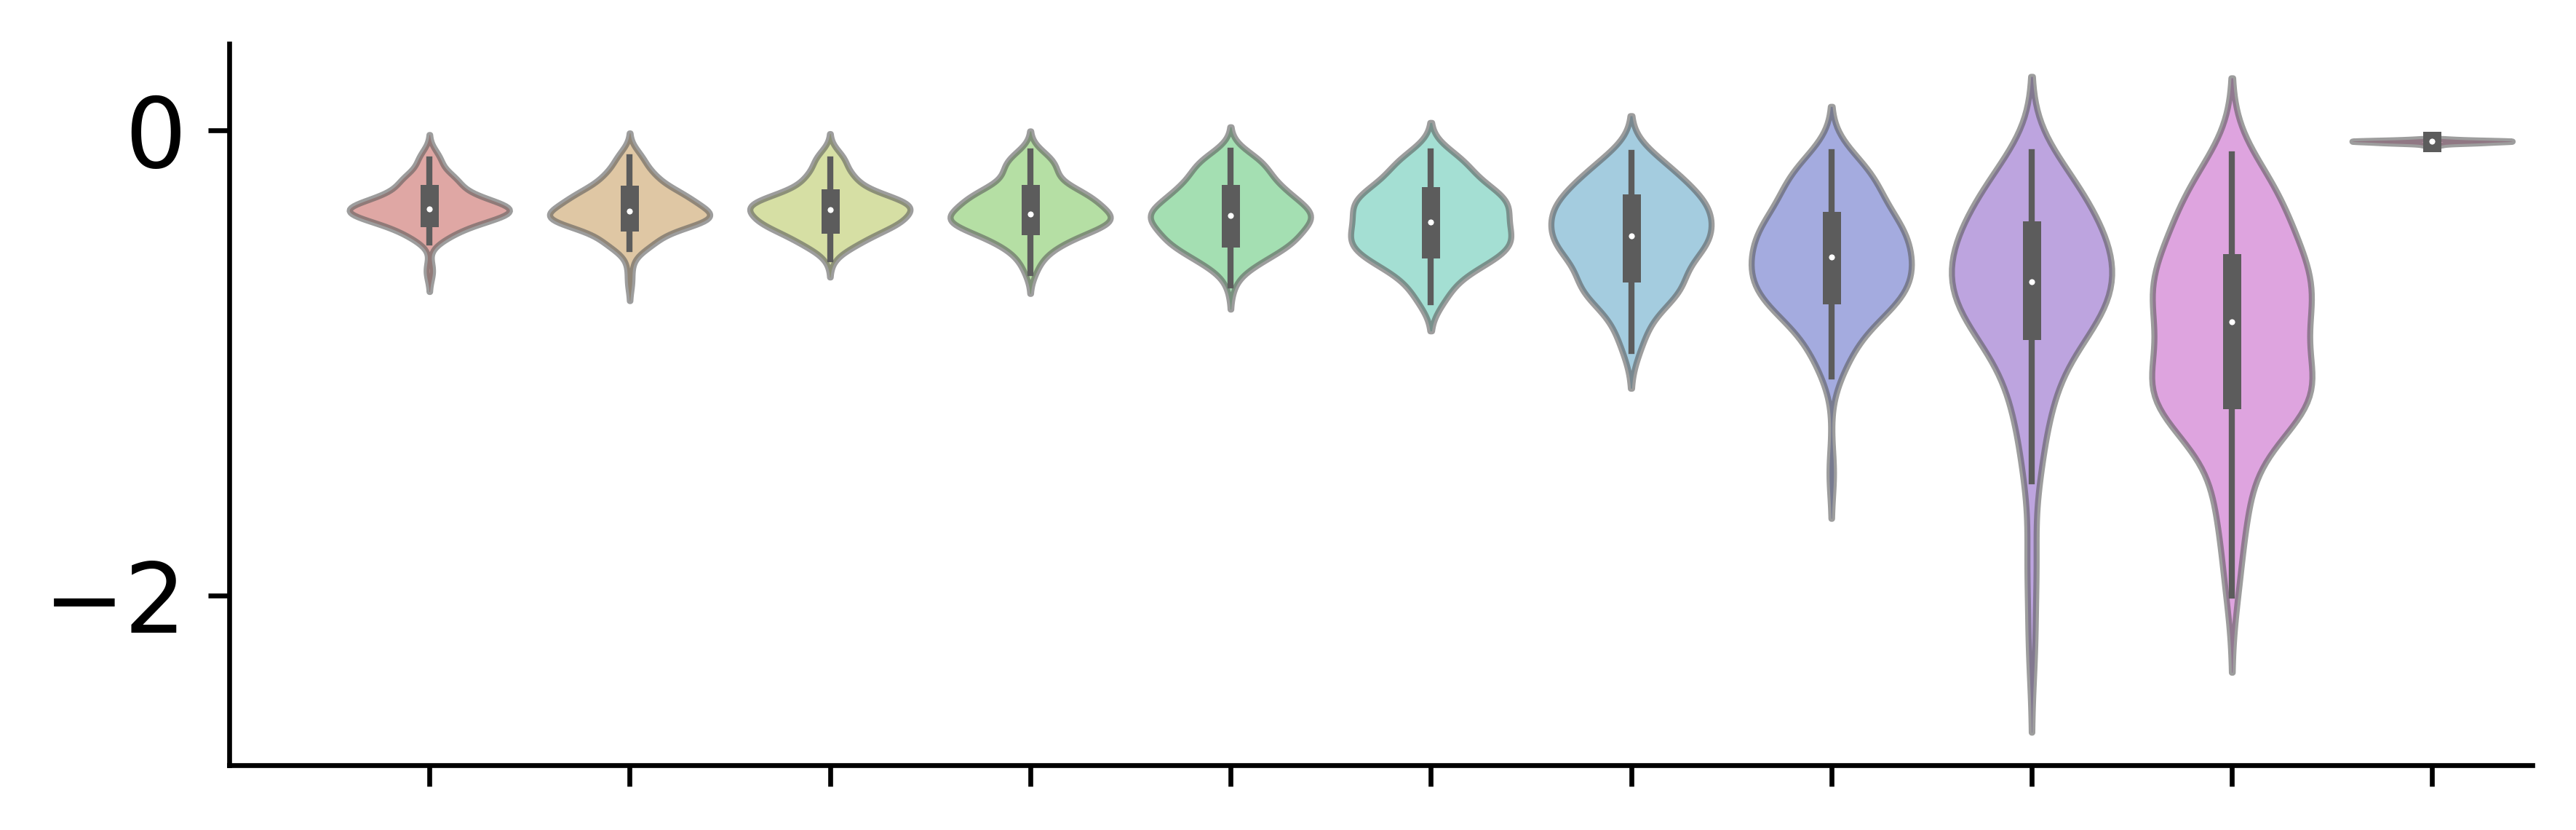

df_energy_o_n20
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0 -0.324888 -0.384981 -0.417479 -0.466061 -0.550071 -0.775503 -1.331232   
1  0.091790  0.100945  0.105810  0.125301  0.159799  0.305355  0.778488   

        0.7  
0 -3.393907  
1  3.227290  


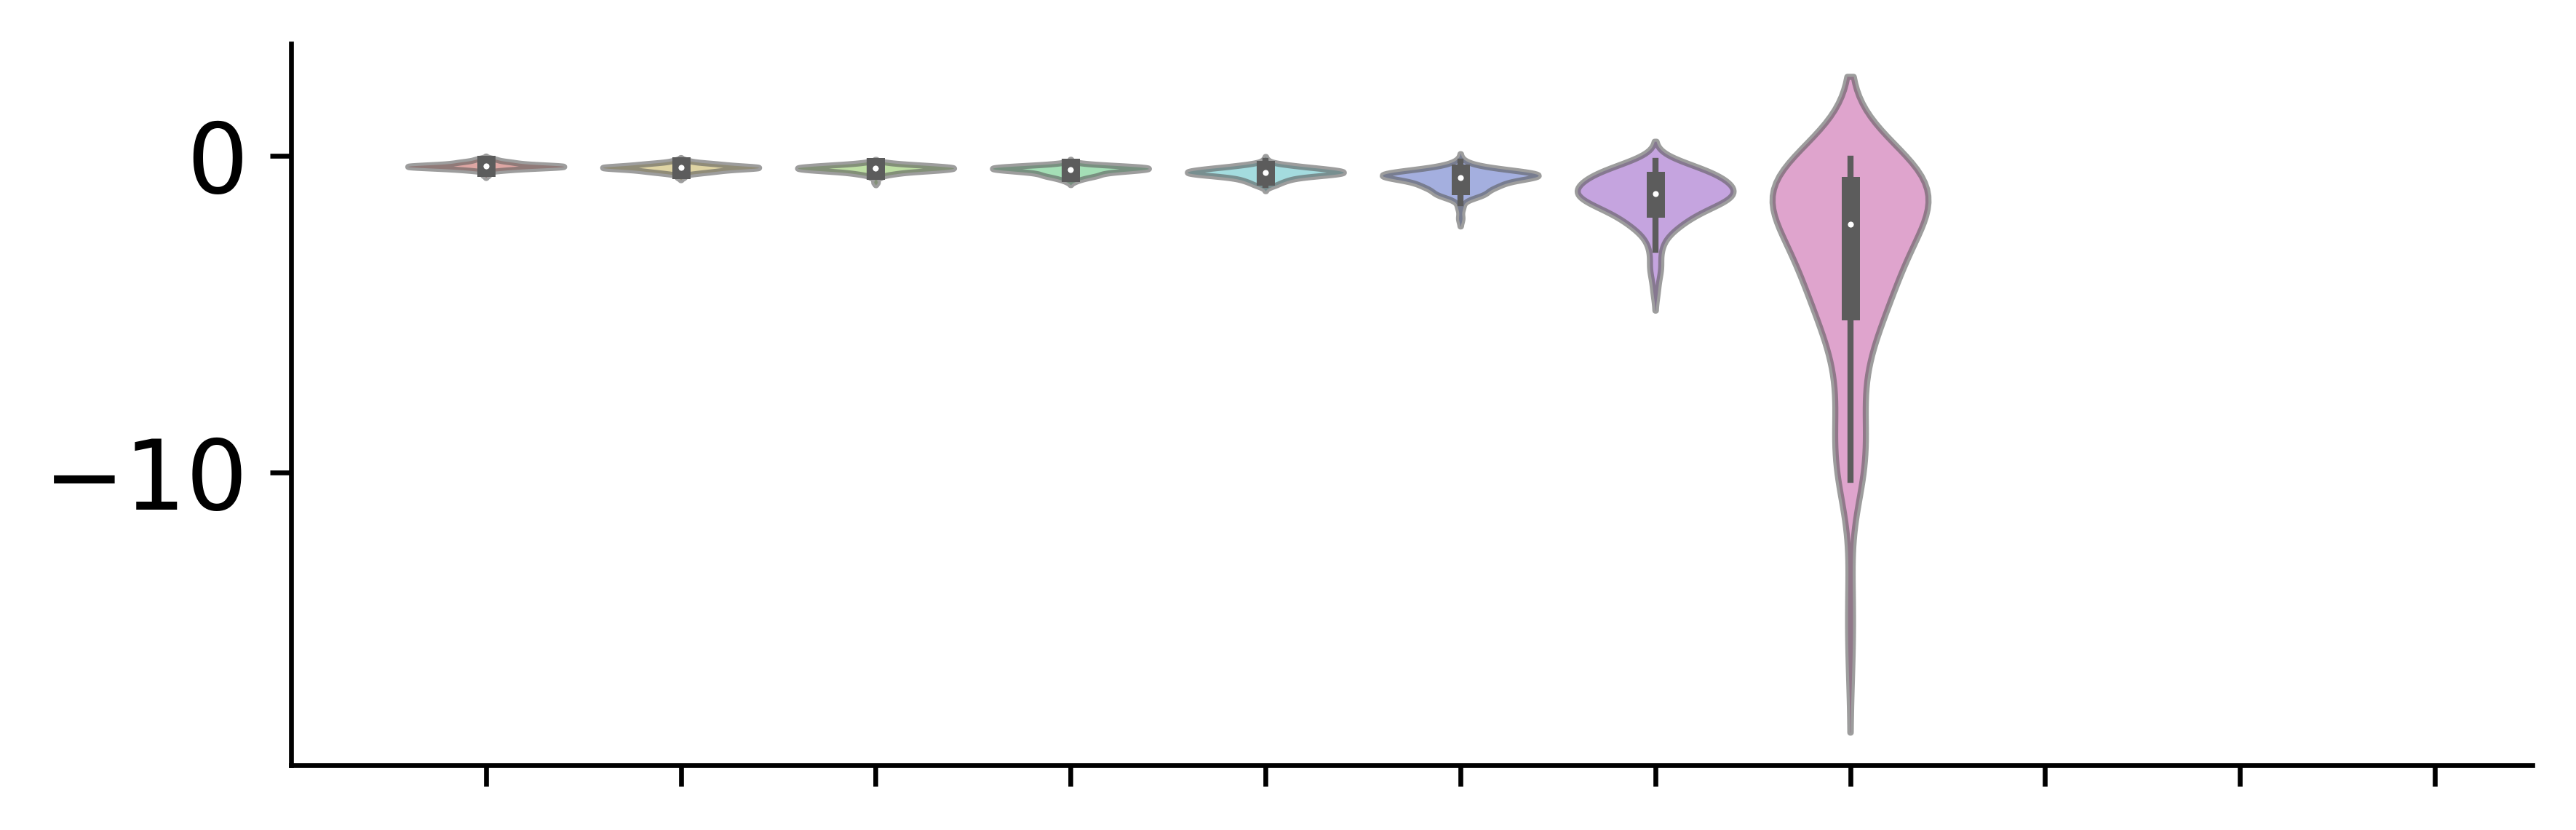

df_energy_r_n20
        0.0      0.1       0.2       0.3       0.4       0.5       0.6  \
0 -0.324888 -0.31774 -0.305213 -0.286629 -0.263873 -0.252303 -0.255794   
1  0.091790  0.09351  0.095718  0.101879  0.093280  0.100452  0.110005   

        0.7       0.8       0.9       1.0  
0 -0.237237 -0.234123 -0.246233 -0.112698  
1  0.117993  0.120892  0.152649  0.052984  


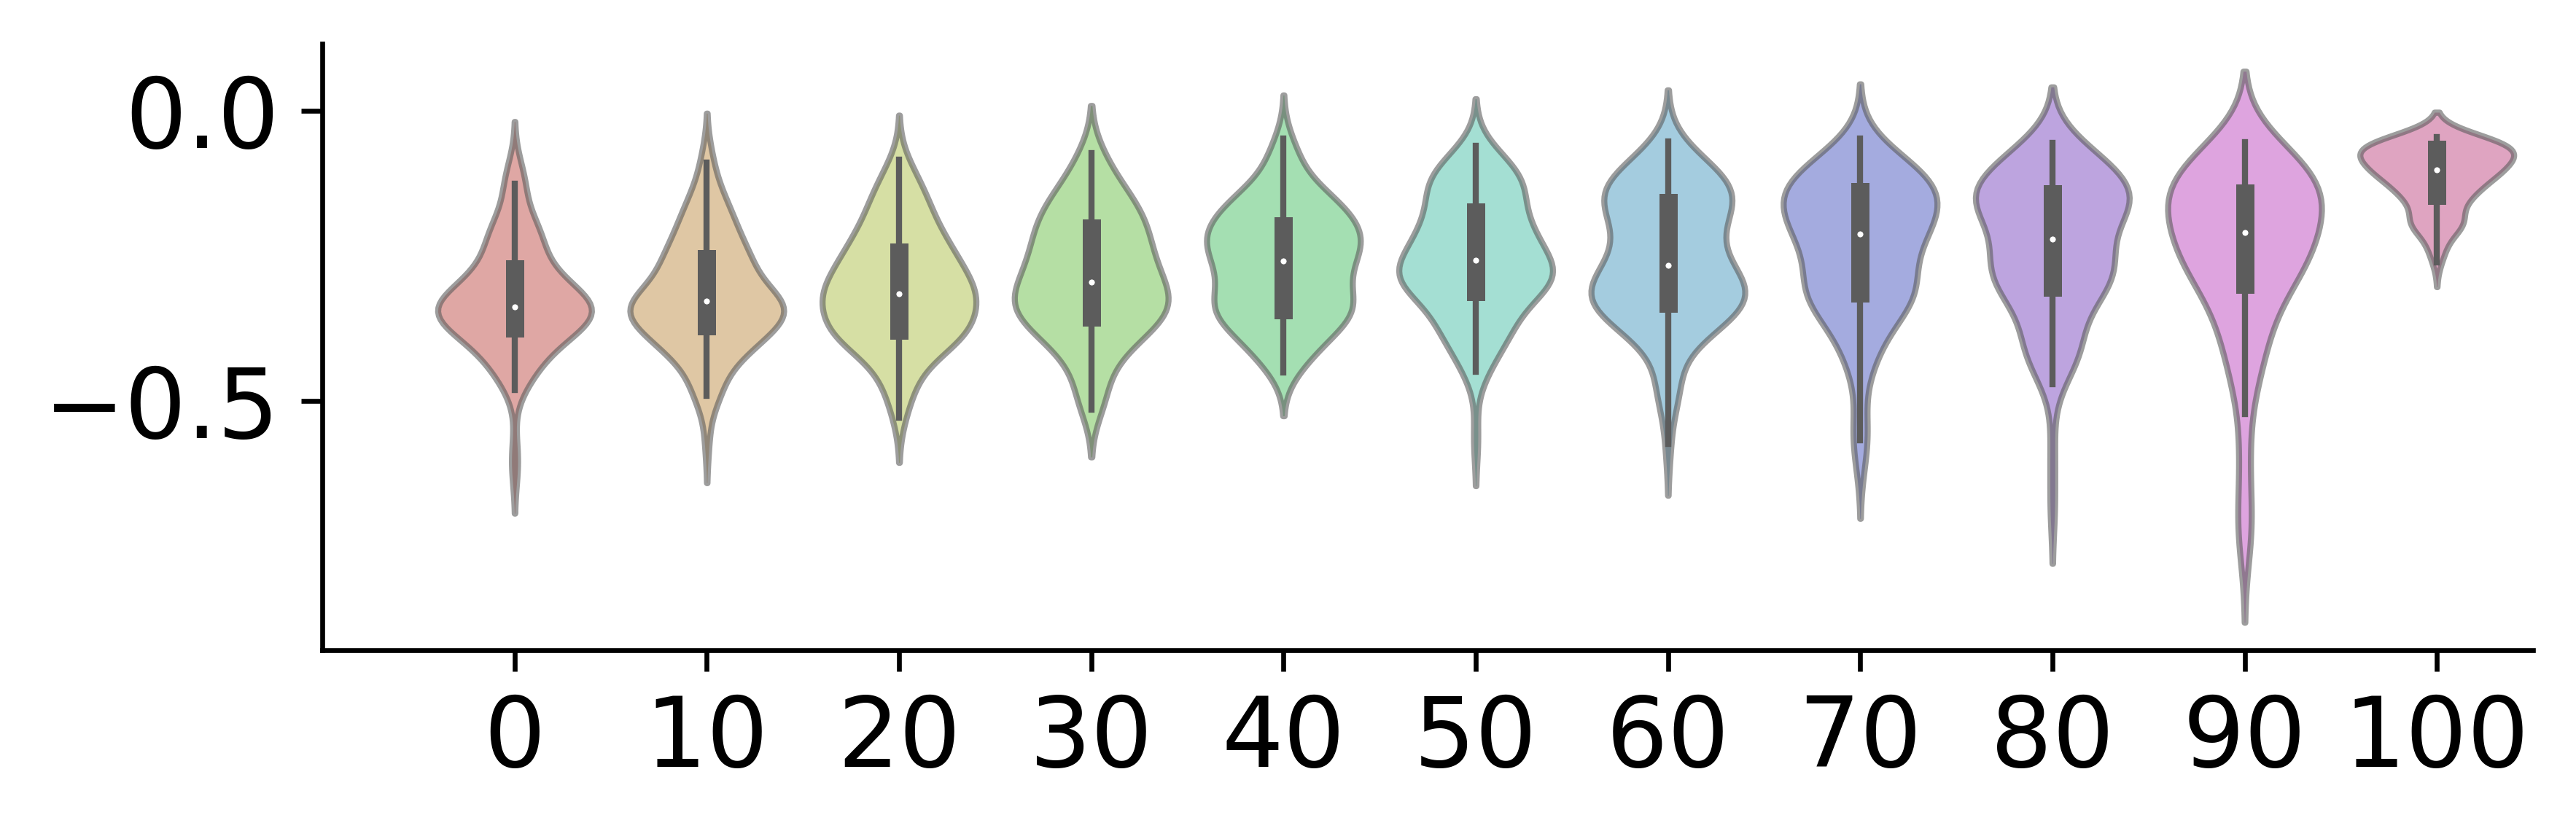

df_energy_all_n50
        0.0       0.1       0.2       0.3       0.4       0.5       0.6
0 -3.108904 -4.117038 -4.701270 -3.867937 -3.913644 -3.813043 -3.273363
1  1.943805  2.616520  4.522527  1.269904  1.039926  1.049442  1.590292


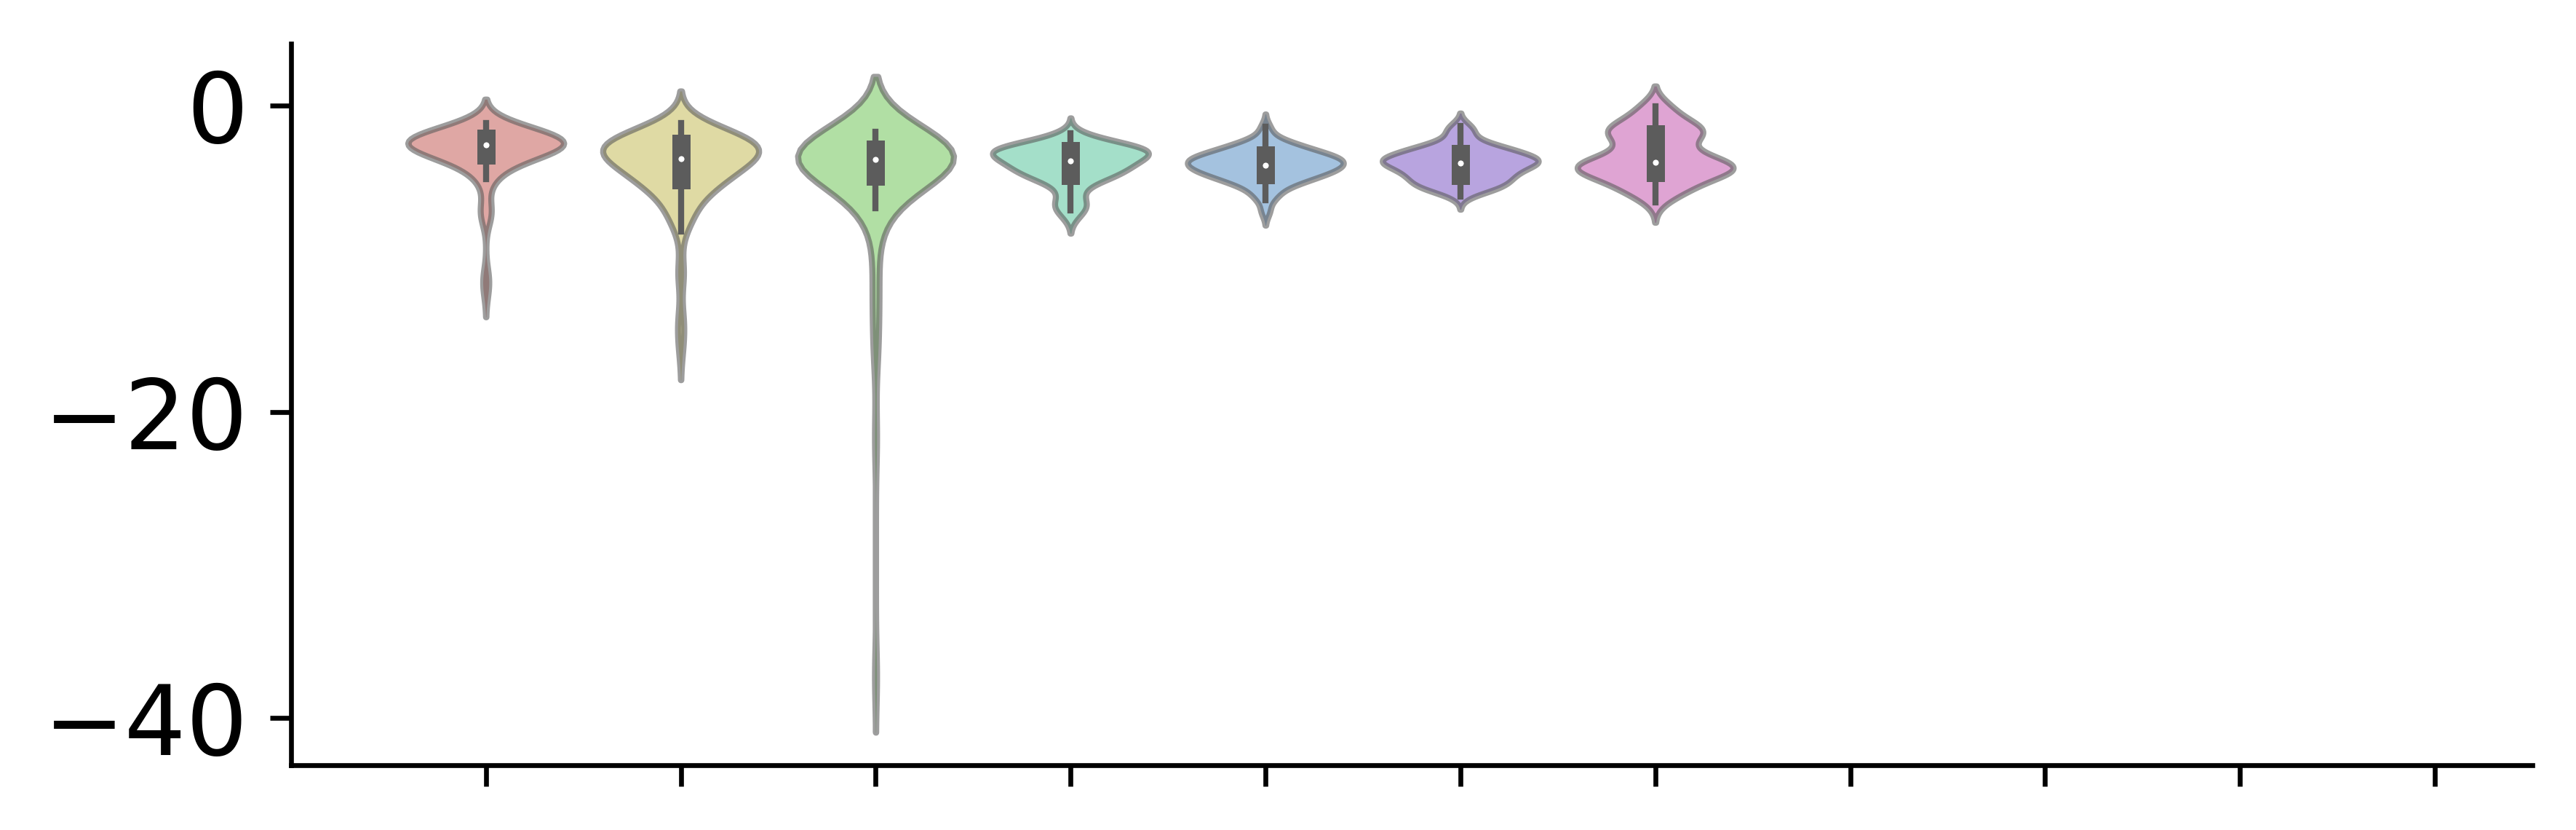

df_energy_a_n50
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0 -3.108904 -2.585662 -2.538151 -2.459312 -2.595273 -2.840945 -3.234907   
1  1.943805  0.769484  0.589854  0.391257  0.370764  0.403523  0.509960   

        0.7       0.8       0.9       1.0  
0 -4.021187 -5.890988 -6.198870 -0.110038  
1  1.293959  2.129038  0.992982  0.016719  


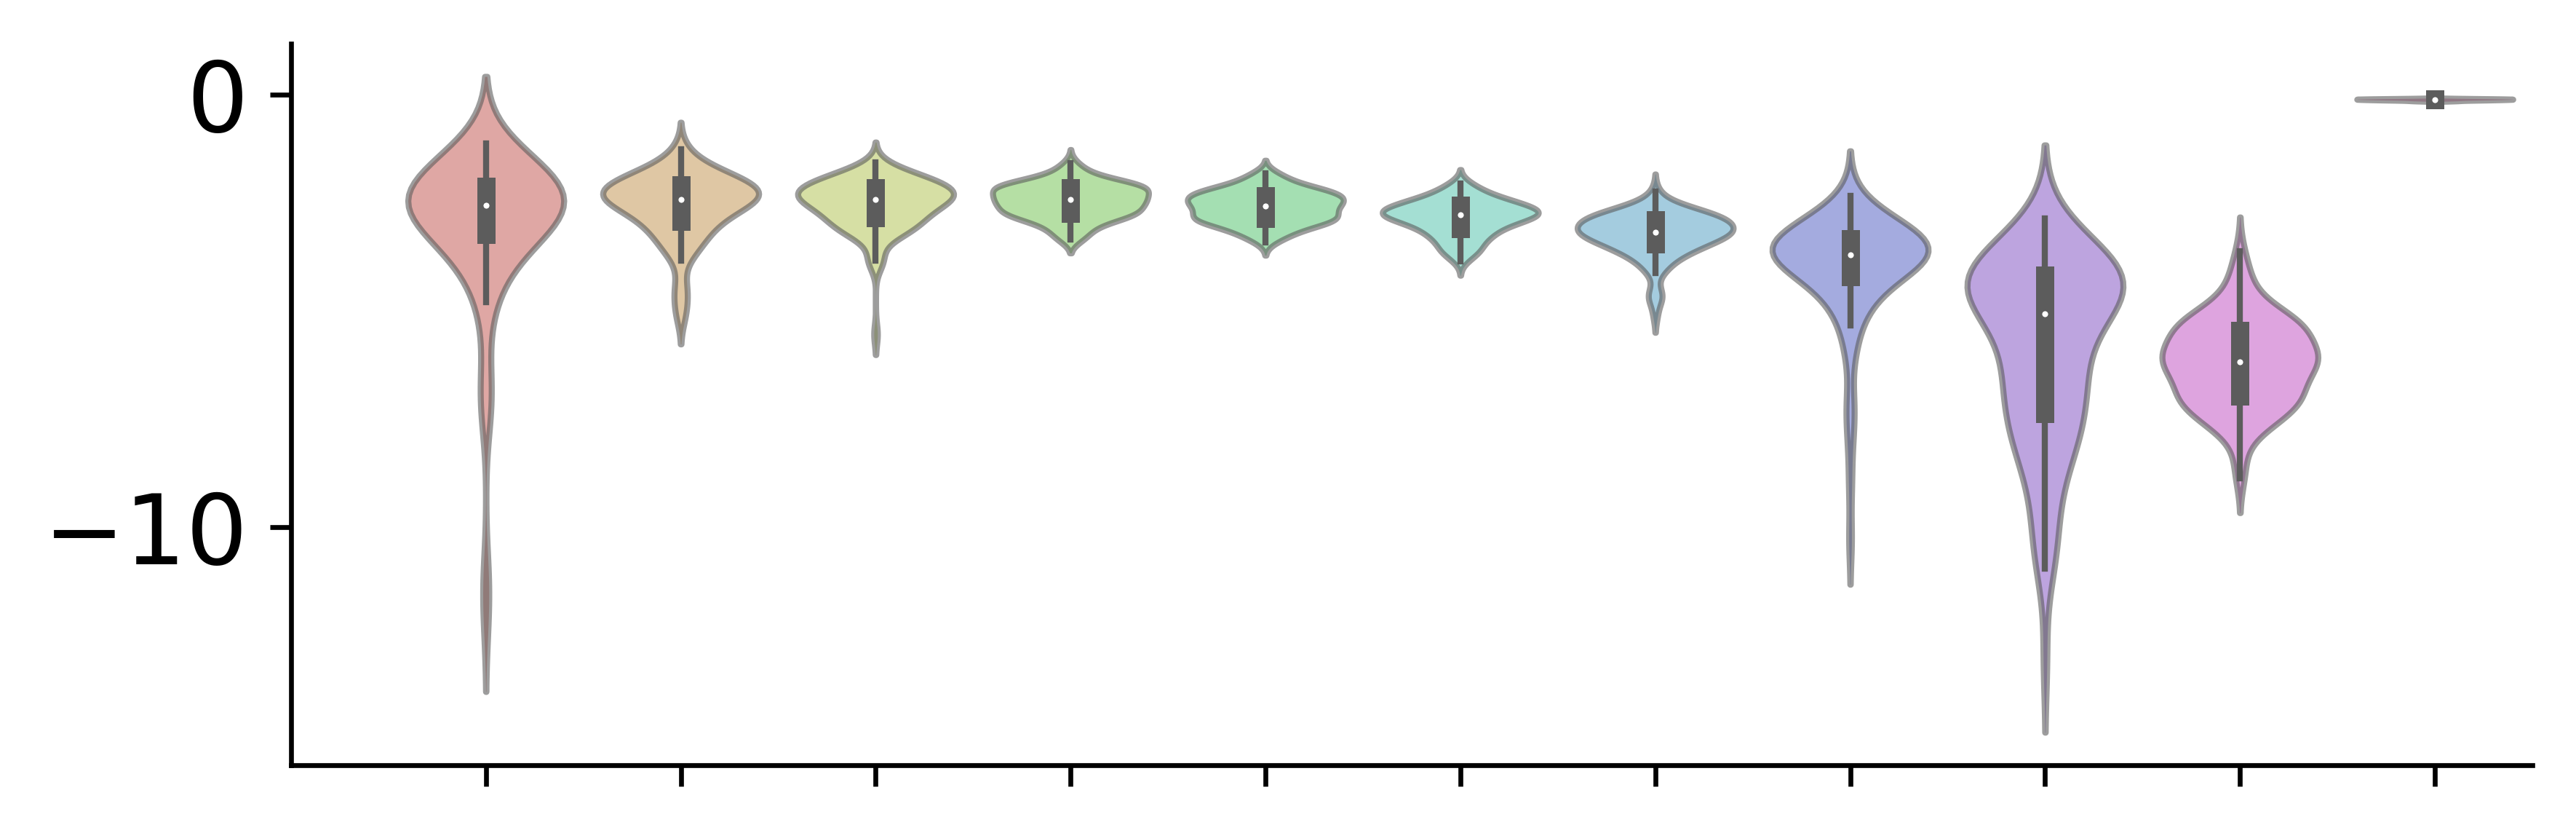

df_energy_o_n50
        0.0       0.1       0.2        0.3
0 -3.108904 -4.253486 -5.482765 -12.809977
1  1.943805  3.629126  5.502571  14.518891


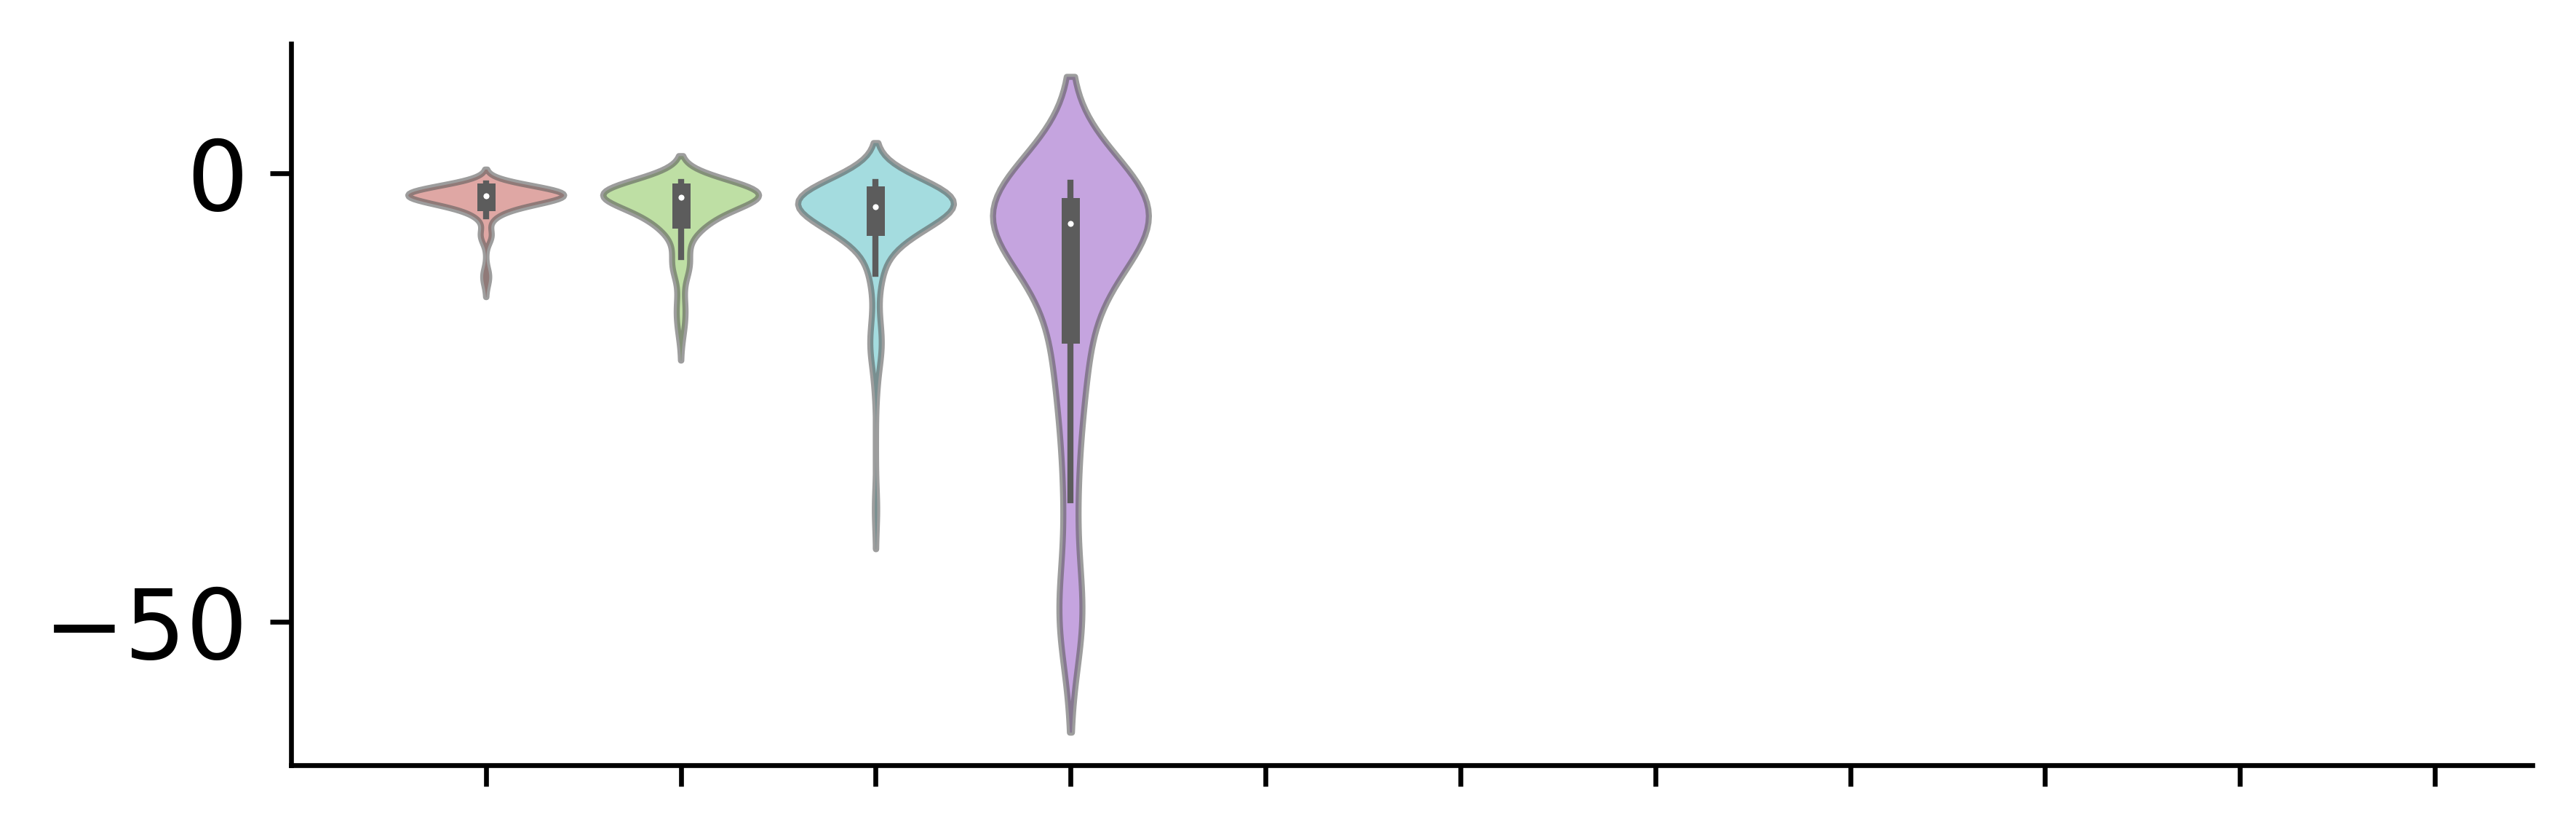

df_energy_r_n50
        0.0       0.1       0.2       0.3       0.4       0.5       0.6  \
0 -3.108904 -2.647613 -2.233957 -2.116195 -1.876669 -1.775958 -1.696927   
1  1.943805  1.521635  0.819515  0.874715  0.580324  0.536468  0.562511   

        0.7       0.8       0.9       1.0  
0 -1.774769 -2.140564 -2.482206 -0.595235  
1  0.623702  1.027605  0.938612  0.167261  


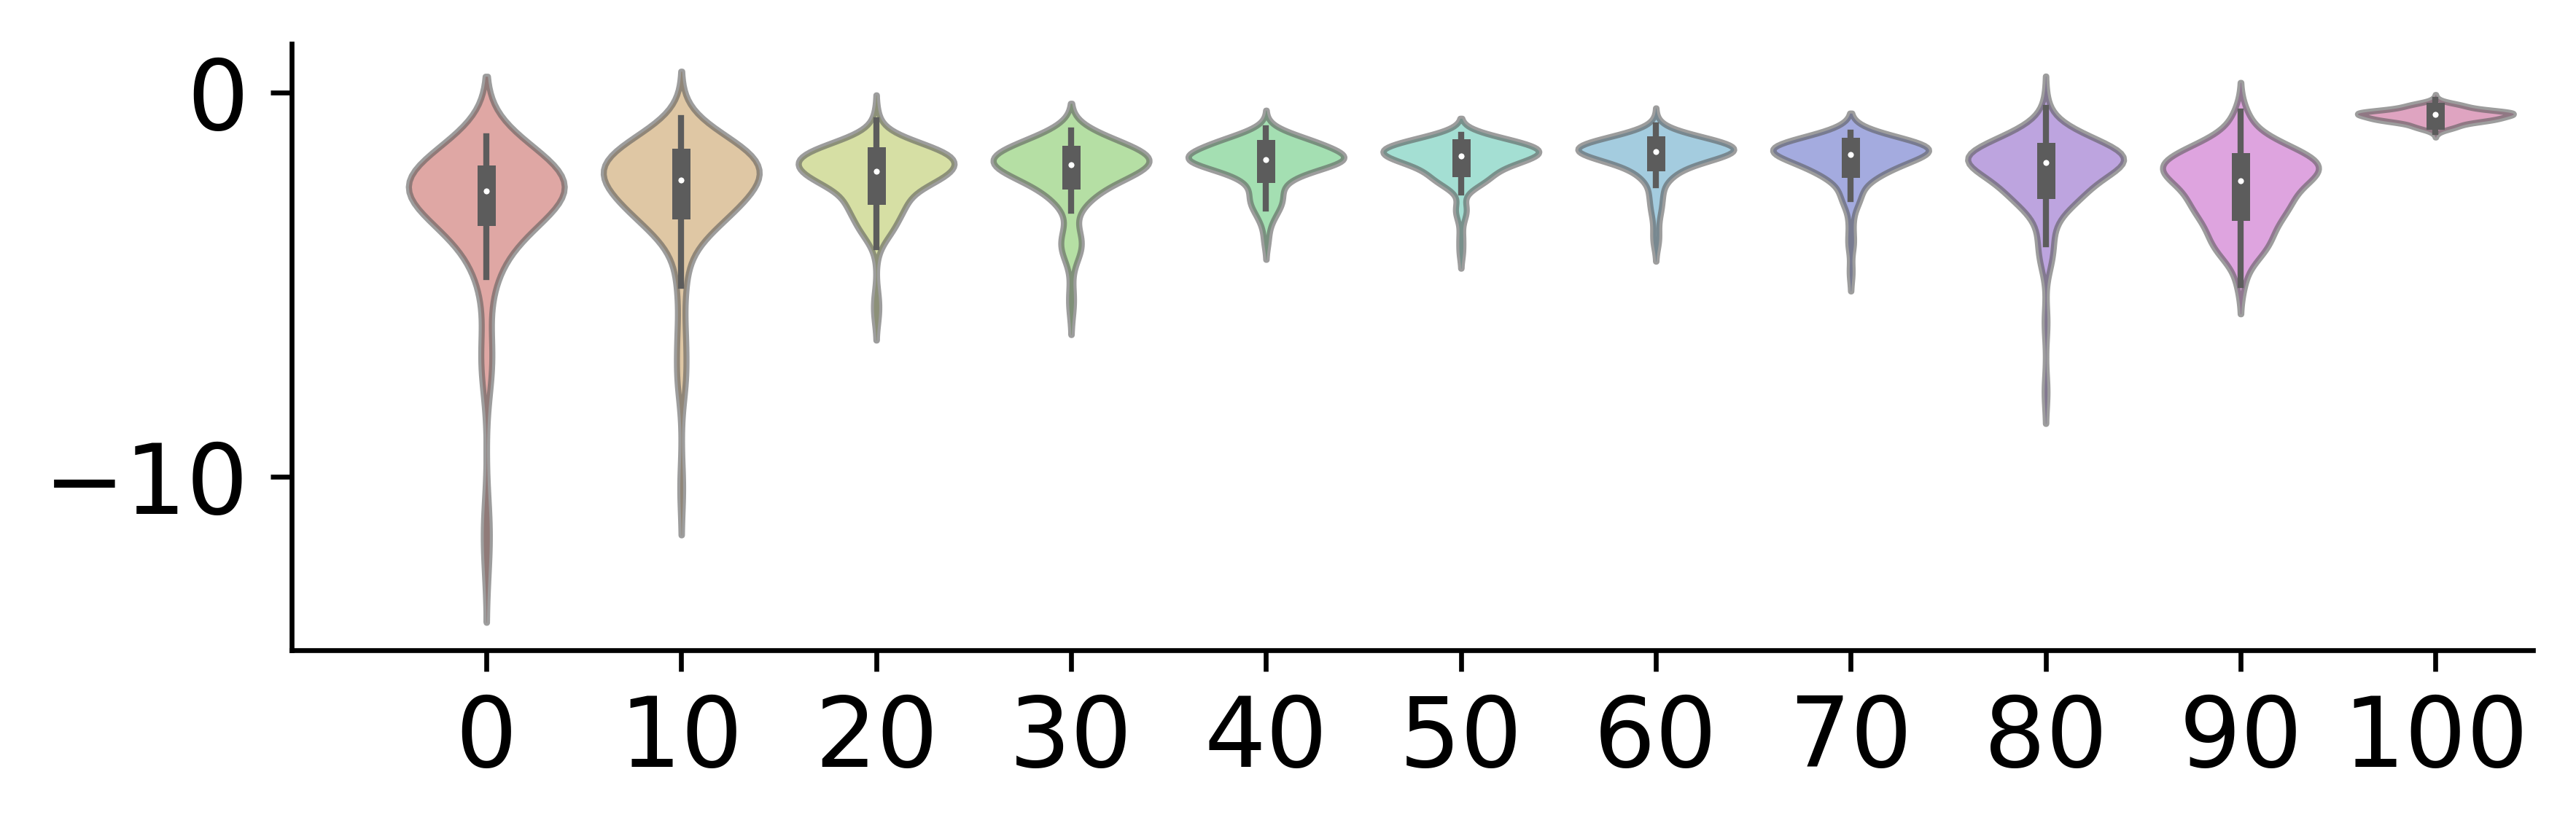

df_energy_all_n80
   0.0        0.1        0.2        0.3        0.4        0.5  0.6  0.7  0.8  \
0  NaN -60.929012 -37.933024 -15.628323 -14.391512 -13.982307  NaN  NaN  NaN   
1  NaN  26.419338  26.982602   3.517386   5.198539   4.408449  NaN  NaN  NaN   

   0.9  1.0  
0  NaN  NaN  
1  NaN  NaN  


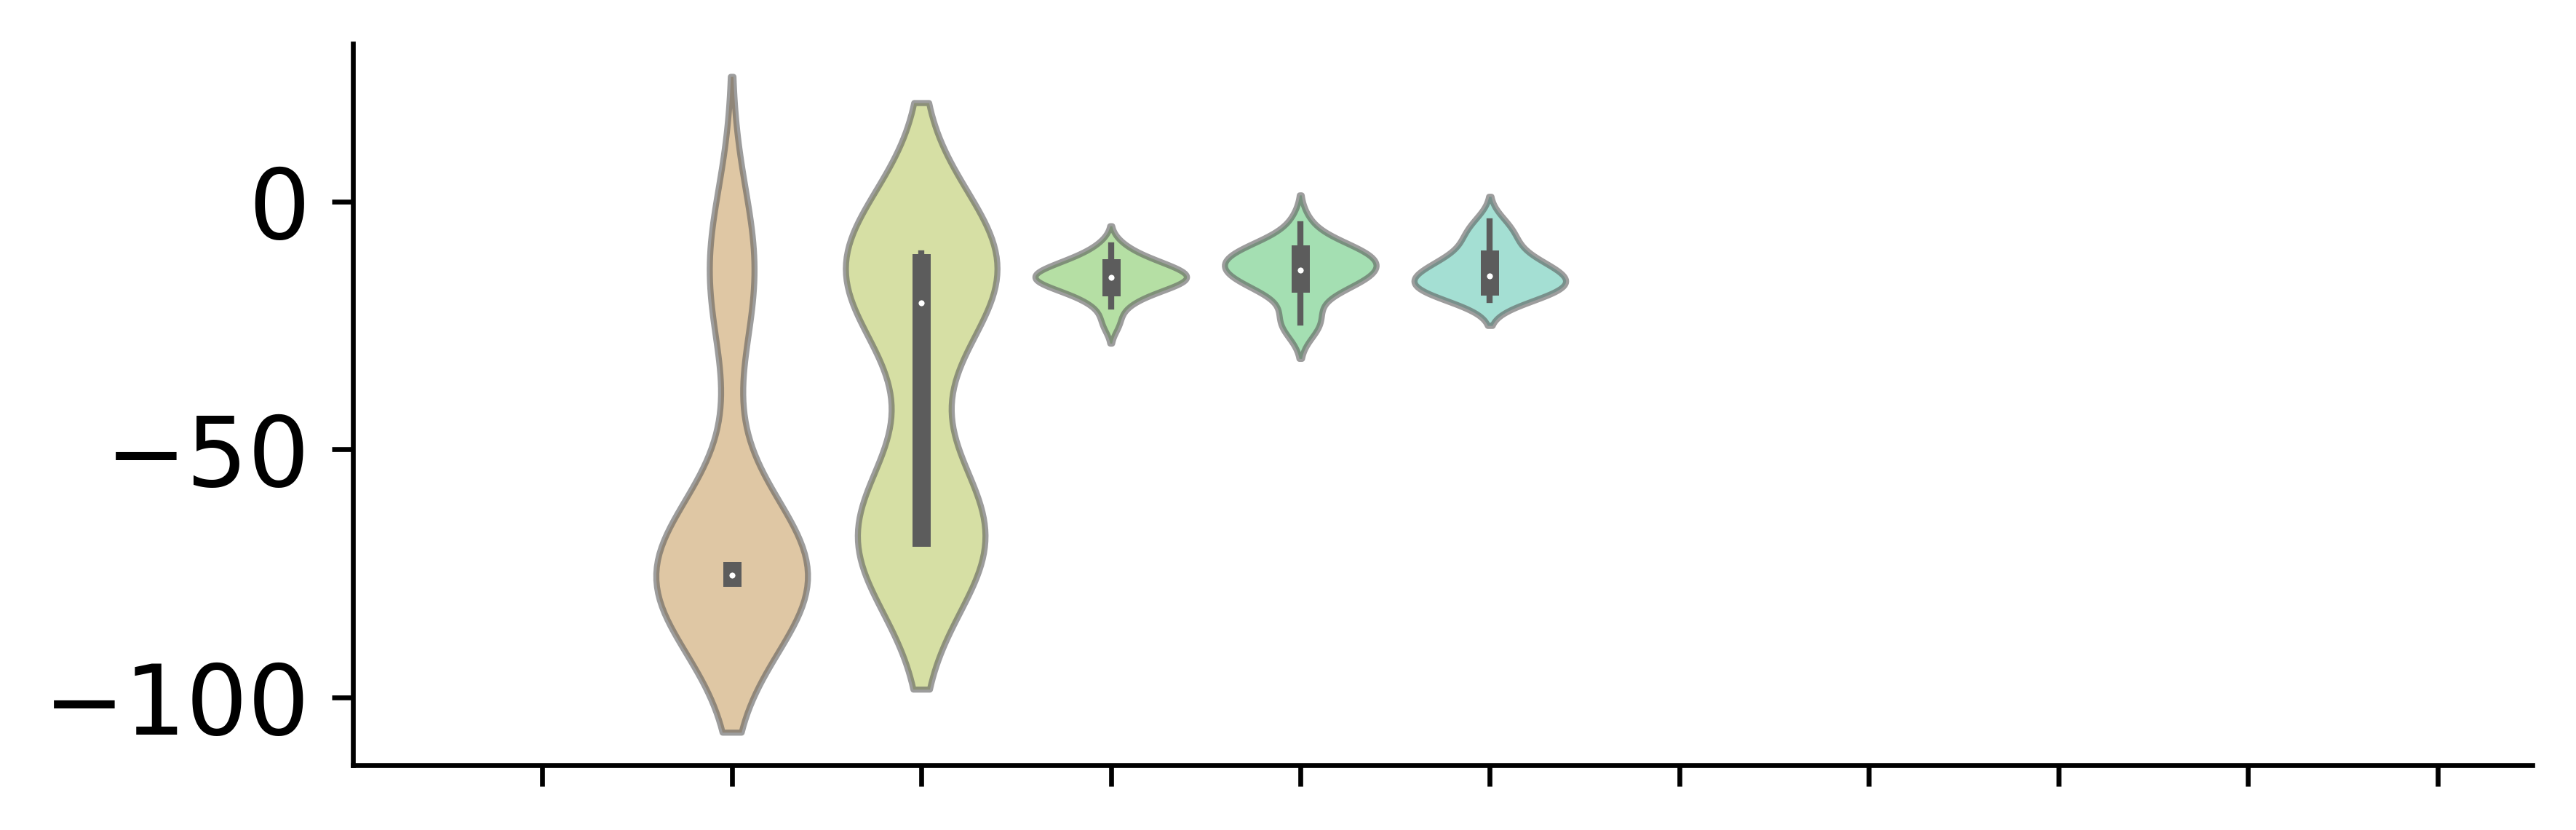

df_energy_a_n80
   0.0        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
0  NaN -11.736047 -7.290269 -6.601767 -6.442139 -6.654519 -7.227033 -9.989179   
1  NaN   4.414861  1.717674  0.831556  0.849683  1.009350  0.814601  4.172632   

         0.8        0.9       1.0  
0 -14.830439 -13.840971 -0.162213  
1   3.846413   1.357611  0.026663  


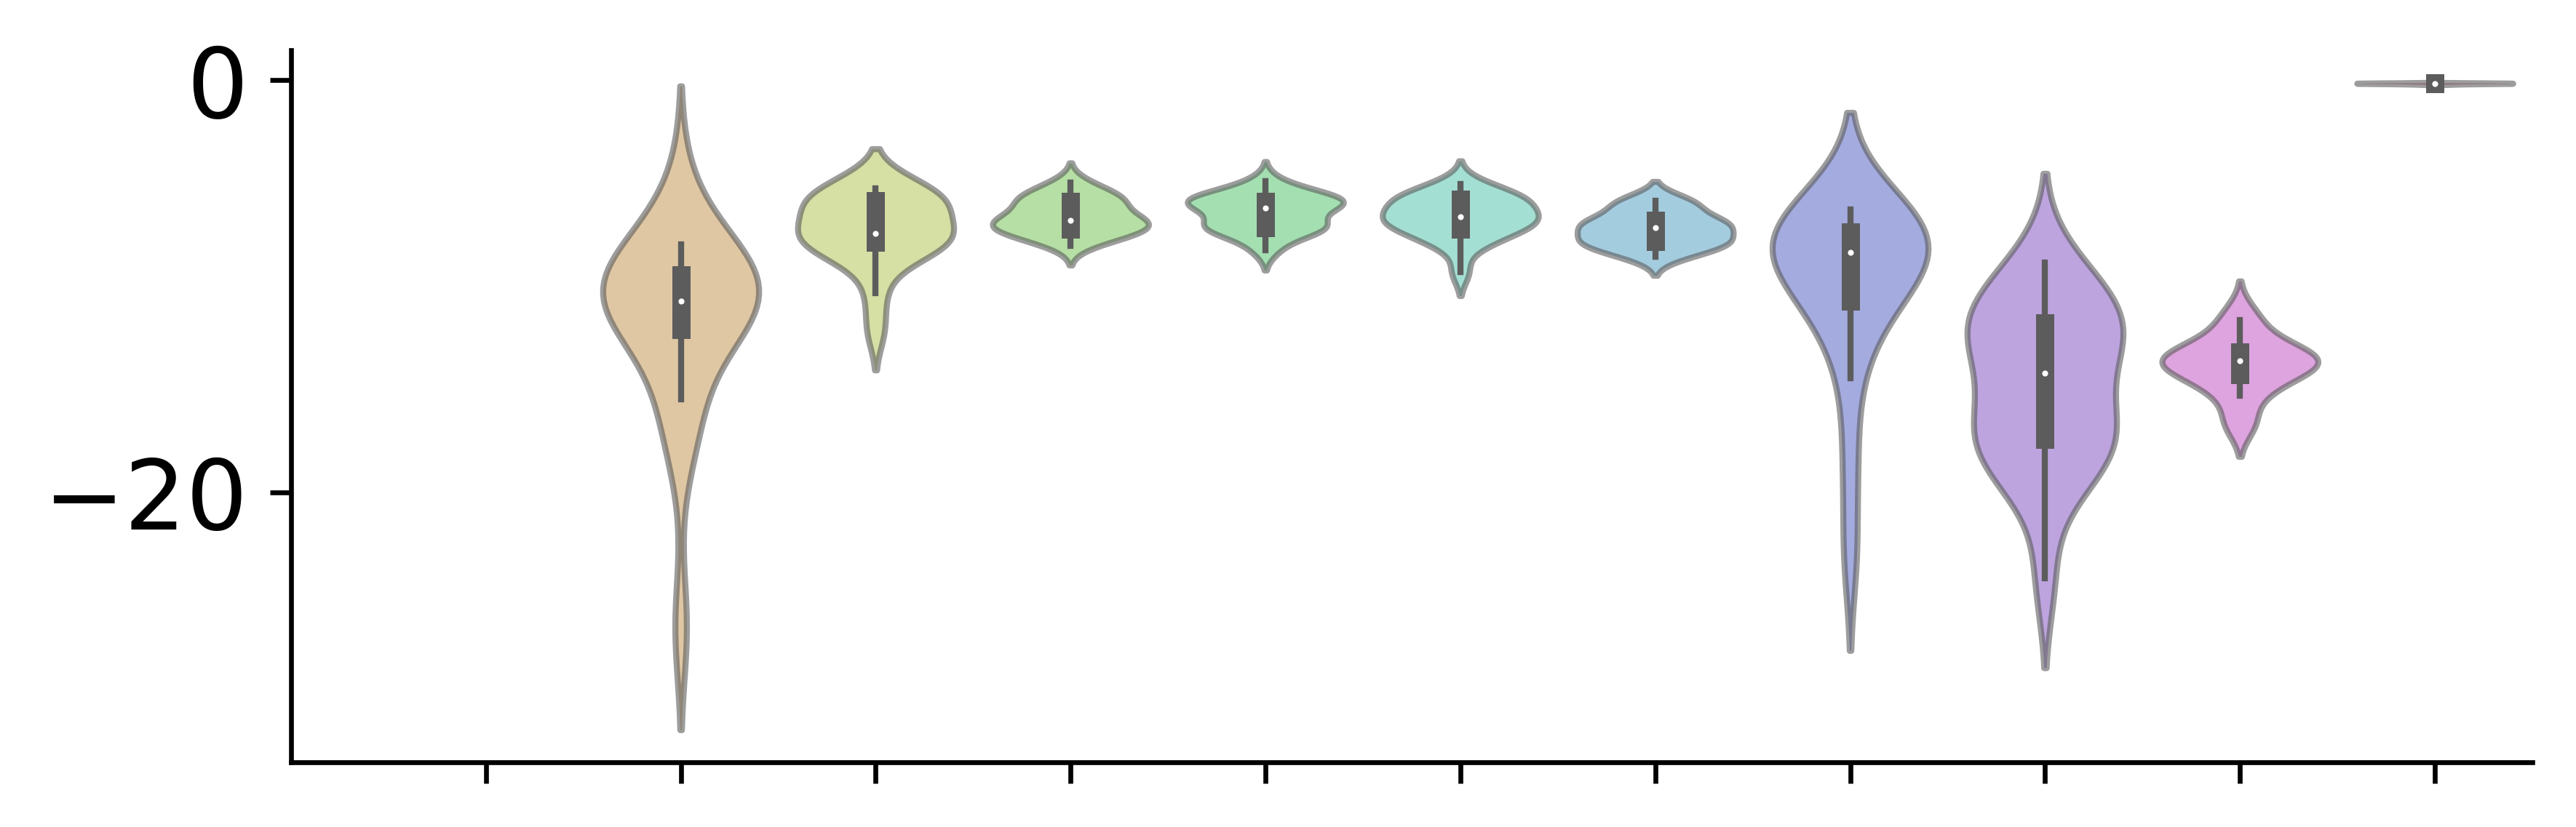

df_energy_r_n80
   0.0  0.1        0.2  0.3        0.4        0.5        0.6        0.7  \
0  NaN  NaN -36.083612  NaN -32.367745 -17.967906 -13.934472 -10.226867   
1  NaN  NaN  34.977821  NaN  29.662787  25.476154  16.727579   9.607502   

        0.8       0.9       1.0  
0 -8.960251 -7.420675 -1.622199  
1  5.958512  1.667840  0.583458  


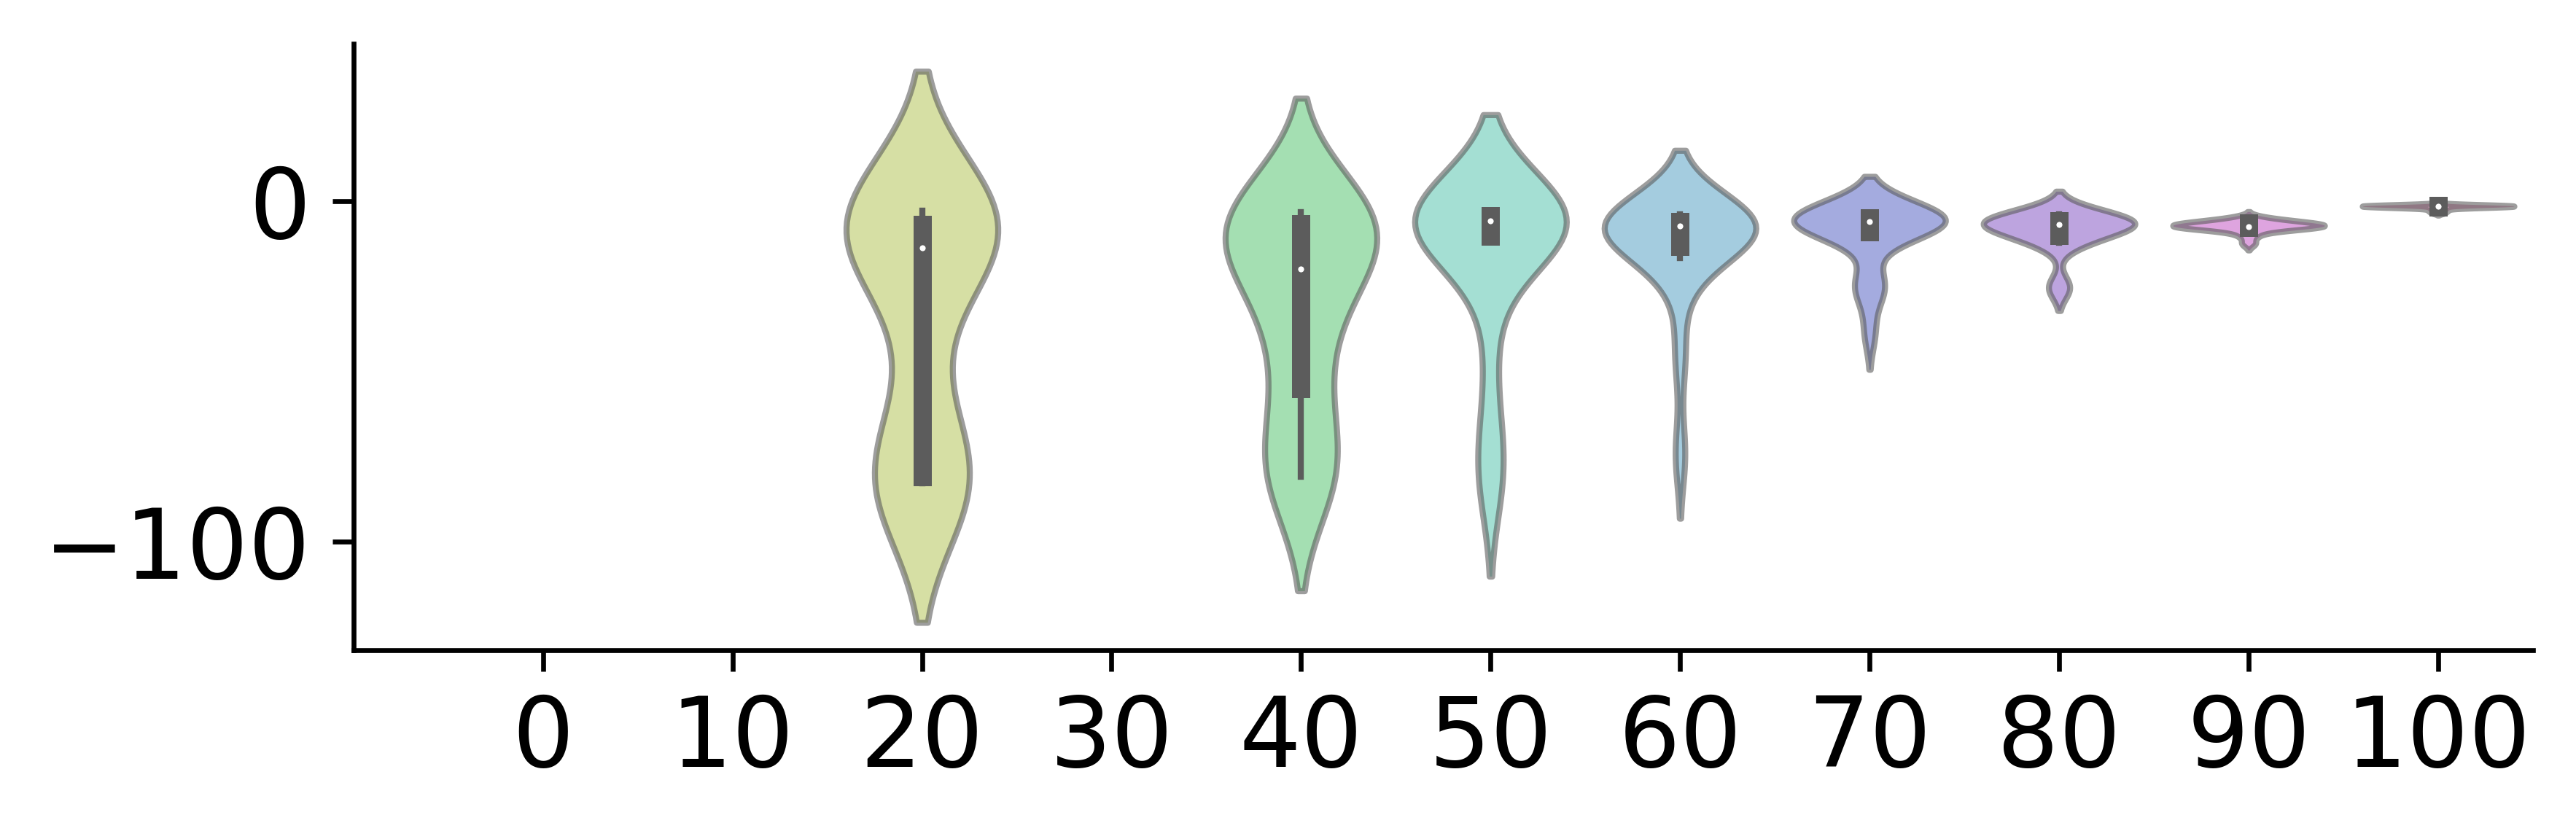

In [34]:
def plot_violin(name='df_energy_all_n20'):
    
    fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(6,2), dpi=600)
    # polarization
    # sns.violinplot(data=dataframes[name],alpha=0.2, edgecolor='none',linewidth=0.1,palette='hls',ax=ax)
    
    data_stats = {}
    for index, (key, value) in enumerate(dataframes[name].items()):
        mean = np.mean(value)
        std = np.std(value)
        data_stats[key] = [mean,std]
    print(name)
    print(pd.DataFrame(data_stats))
    

    # if np.std(dataframes[name].iloc[:, -1].values) < 0.02:
    #     sns.violinplot(data=dataframes[name].iloc[:, :-1],alpha=0.3, edgecolor='none',linewidth=0.1,palette='hls',ax=ax)
    # else:
    sns.violinplot(data=dataframes[name],alpha=0.3, edgecolor='black',linewidth=1,palette='hls',ax=ax,scale='width')
    

    ax.spines['top'].set_visible(False)  # Hide the top spine
    ax.spines['right'].set_visible(False)  # Hide the right spine
    for art in ax.get_children():
        if isinstance(art, matplotlib.collections.PolyCollection):
            art.set_alpha(0.6)

    xticks = range(11)  # Set x-ticks positions based on the number of columns
    ax.set_xlim(-1, 10.5)
    ax.set_xticks(xticks)
    if '_r' not in name:
    # Apply empty x-tick labels
        ax.set_xticklabels([''] * len(xticks))  # Pass an empty string for each x-tick
    else:
        # Apply x-tick labels that are 10 times the x-tick positions
        ax.set_xticklabels([str(int(x) * 10) for x in xticks], rotation=0)
    ax.tick_params(axis='both', which='major', labelsize=16)
    plt.tight_layout()
    plt.savefig('{:s}.png'.format(name),dpi=600,format='png',bbox_inches='tight', transparent=True)
    plt.show()

# plot_violin(name='df_ct_a_n20')
# plot_violin(name='df_ct_r_n20')

plot_violin(name='df_energy_all_n20')
plot_violin(name='df_energy_a_n20')
plot_violin(name='df_energy_o_n20')
plot_violin(name='df_energy_r_n20')

plot_violin(name='df_energy_all_n50')
plot_violin(name='df_energy_a_n50')
plot_violin(name='df_energy_o_n50')
plot_violin(name='df_energy_r_n50')

plot_violin(name='df_energy_all_n80')
plot_violin(name='df_energy_a_n80')
plot_violin(name='df_energy_r_n80')

# plot_breakable_violin(name='df_energy_all_n80',ylim=[-30, 5],ylim2=[-100, -70])
# plot_breakable_violin(name='df_energy_a_n80',ylim=[-10, 0],ylim2=[-20, -10])
# plot_breakable_violin(name='df_energy_r_n80',ylim=[-10, 0],ylim2=[-20, -10])

# plot_violin(name='df_energy_o_n80')



In [2]:
def load_npy(file_path):
    data = np.load(file_path)
    return data

# Example usage:
file_paths = [
    './Data/FSR/20D-${\\bf Z_{all}}$FSR.npy',  # Assuming these are actually JSON files
    './Data/FSR/20D-${\\bf Z_{a}}$FSR.npy',
    './Data/FSR/20D-${\\bf Z_{o}}$FSR.npy',
    './Data/FSR/20D-${\\bf Z_{r}}$FSR.npy',
    './Data/FSR/50D-${\\bf Z_{all}}$FSR.npy',  # Assuming these are actually JSON files
    './Data/FSR/50D-${\\bf Z_{a}}$FSR.npy',
    './Data/FSR/50D-${\\bf Z_{o}}$FSR.npy',
    './Data/FSR/50D-${\\bf Z_{r}}$FSR.npy',
    './Data/FSR/80D-${\\bf Z_{all}}$FSR.npy',  # Assuming these are actually JSON files
    './Data/FSR/80D-${\\bf Z_{a}}$FSR.npy',
    './Data/FSR/80D-${\\bf Z_{o}}$FSR.npy',
    './Data/FSR/80D-${\\bf Z_{r}}$FSR.npy',
]

df_names = ['df_fsr_all_n20', 'df_fsr_a_n20', 'df_fsr_o_n20', 'df_fsr_r_n20',
             'df_fsr_all_n50', 'df_fsr_a_n50', 'df_fsr_o_n50', 'df_fsr_r_n50',
             'df_fsr_all_n80', 'df_fsr_a_n80', 'df_fsr_o_n80', 'df_fsr_r_n80']
all_data = {name: load_npy(path) for name, path in zip(df_names, file_paths)}

# To print the first few rows of each DataFrame
# for name, df in all_data.items():
#     print(f"{name}:")
#     print(np.shape(df), "\n")


In [3]:
# with a cut-off of 80% iterations larger than 0.8
all_cf = []
for name, data in all_data.items():
    # print(name)
    cf = np.sum(data>0.8,axis=1)/np.shape(data)[1]
    all_cf.append(cf)

all_cf = np.array(all_cf)
# print(all_cf)
    

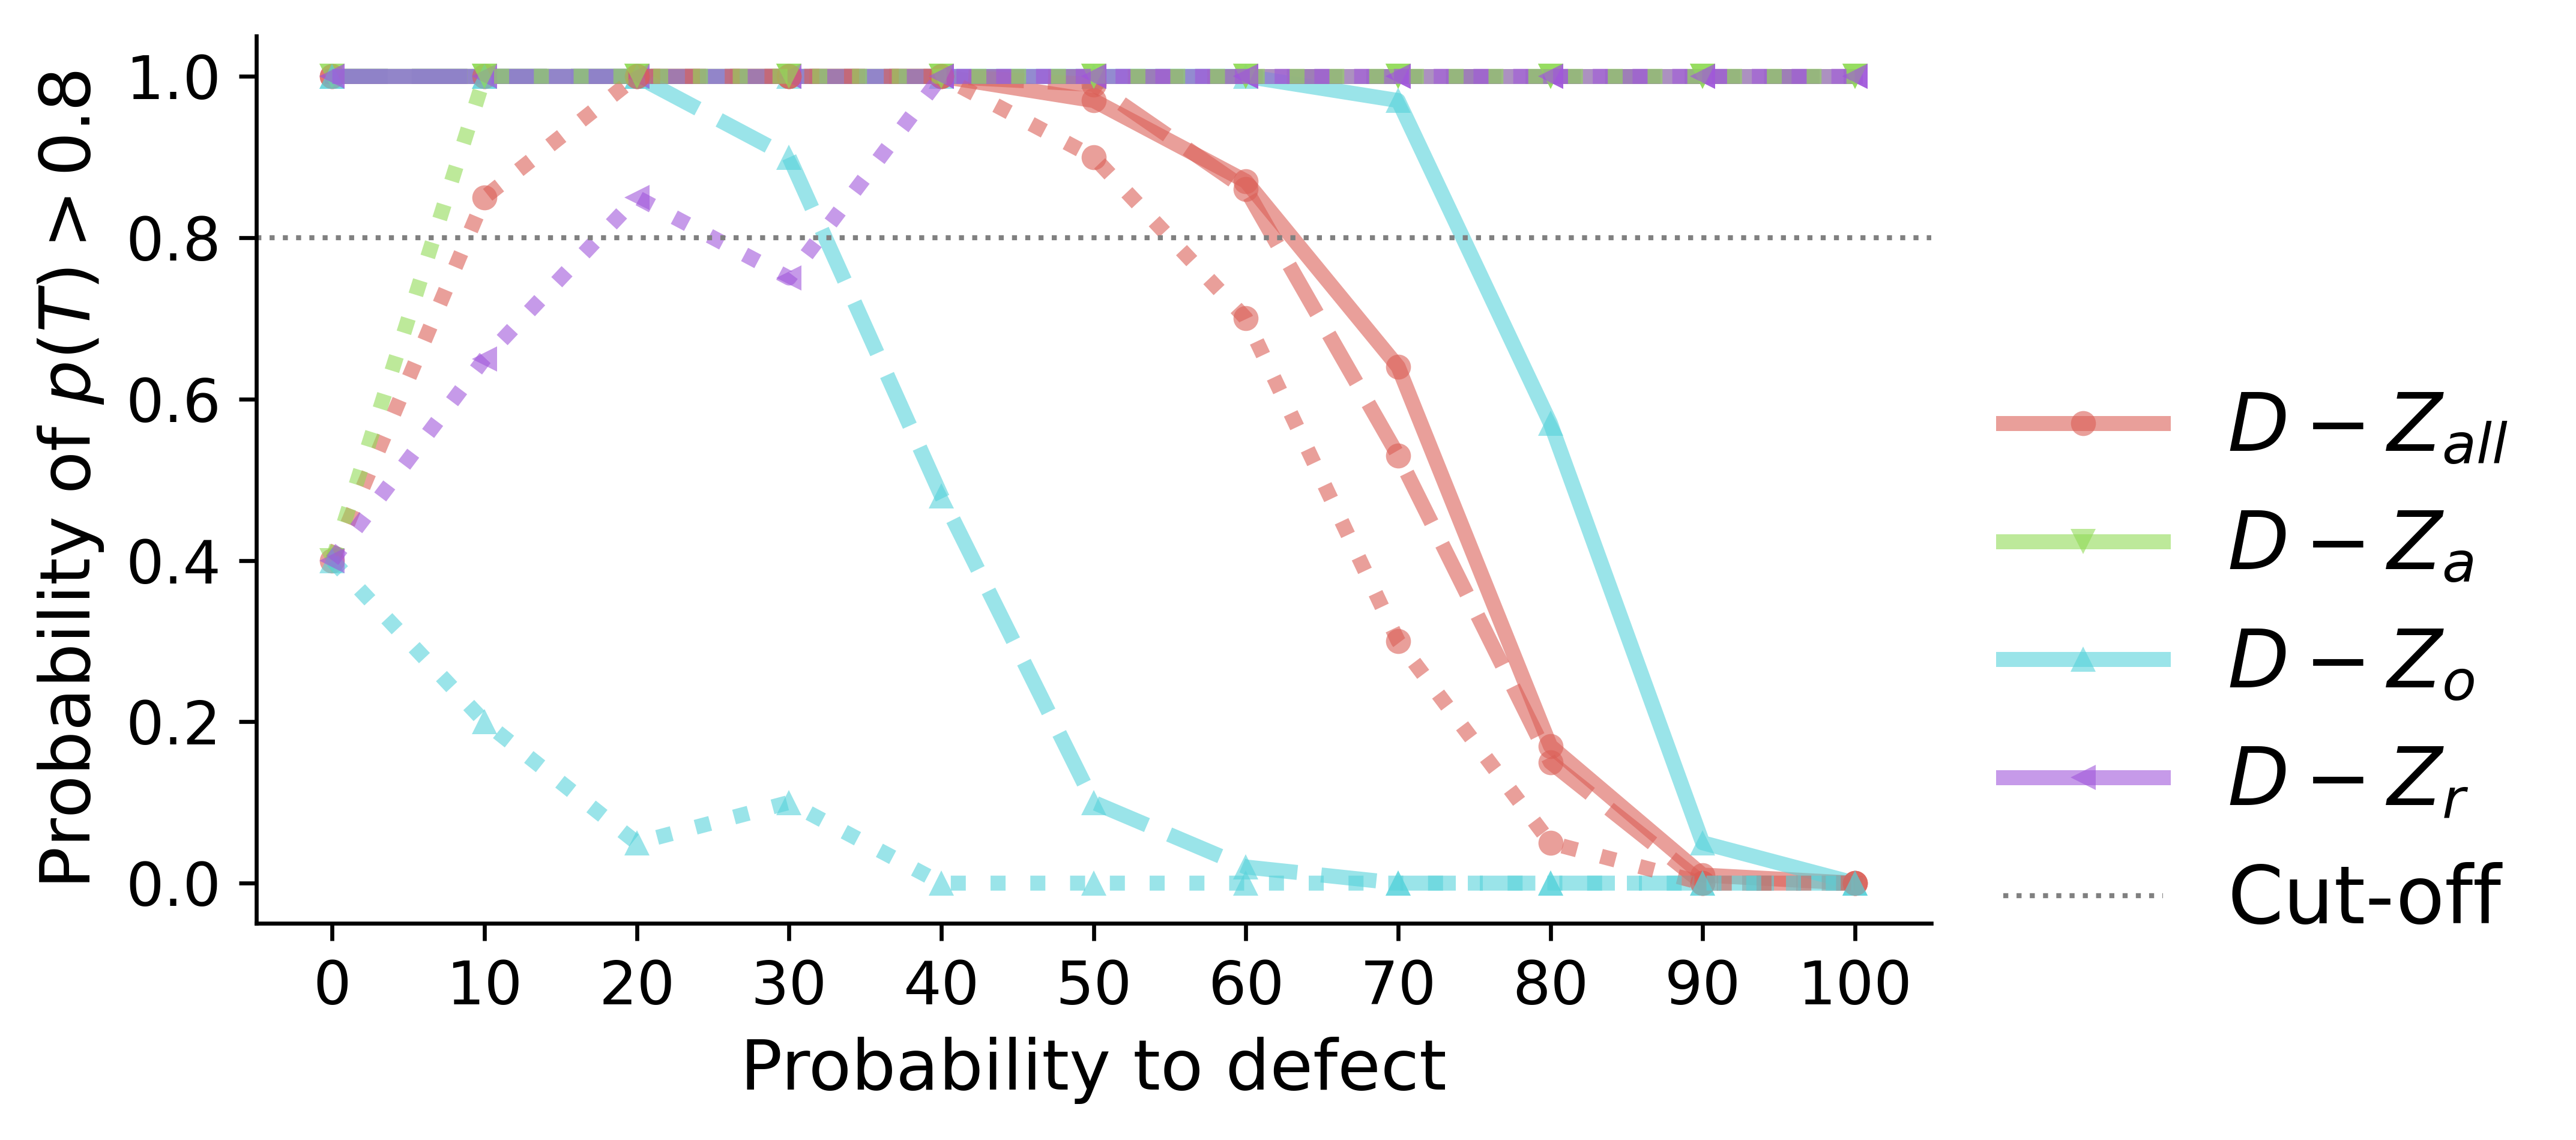

In [4]:
cs = sns.color_palette("hls", 4)  # 8 colors
# 8 markers
markers = ['o', 'v', '^', '<', '>', 's', 'p', 'P']
lineStyles = ['-', '-', '-', '-', '--', '--', '--', '--',':',':',':',':']
legends = ['$D-Z_{all}$', '$D-Z_{a}~$', '$D-Z_{o}~$', '$D-Z_{r}~$',
           '$D-Z_{all}$', '$D-Z_{a}~$', '$D-Z_{o}~$', '$D-Z_{r}~$']

fig, ax = plt.subplots(nrows=1,ncols=1,sharex=True,figsize=(6,3.2),dpi=600)

for i in range(12):
    if i<4:
        ax.plot(all_cf[i,:],linewidth=3,color=cs[i%4],
            marker=markers[i%4],markersize=5,label=legends[i],
            alpha=0.6,markeredgewidth=0,
            ls=lineStyles[i])
    else:
        ax.plot(all_cf[i,:],linewidth=3,color=cs[i%4],
            marker=markers[i%4],markersize=5,
            alpha=0.6,markeredgewidth=0,
            ls=lineStyles[i])
    
# a horizontal line at y=0.8
ax.axhline(0.8, color='gray', linestyle=':', lw=1,label='Cut-off')

plt.xticks(range(11), [str(i*10) for i in range(11)],font={'size':12})
plt.yticks(np.arange(0,1.1,0.2), [str(np.round(i*0.1,decimals=1)) for i in range(0,11,2)],font={'size':12})
plt.xlabel('Probability to defect',fontsize=14)
plt.ylabel('Probability of $p(T)>0.8$',fontsize=14)
plt.legend(frameon=False,loc='lower left',bbox_to_anchor=(1, -0.1),fontsize=16)
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
# Solid line N = 20 , dashed line N = 50
# plt.tight_layout()
plt.savefig('FSR80A.pdf',dpi=600,format='pdf',bbox_inches='tight')
plt.show()